In [149]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [150]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp

In [151]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '86b2d8'

# Task 1: Reading the data
## Subtask 1.1:Read the AI ML DATA SALARIES Data.
**Read the AI,ML Data Salaries data file provided and store it in a dataframe.**

In [152]:
data=pd.read_csv("salaries.csv")
data

work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        AWS Data Architect   
1          2023               SE              FT            Data Scientist   
2          2023               SE              FT            Data Scientist   
3          2023               SE              FT             Data Engineer   
4          2023               SE              FT             Data Engineer   
...         ...              ...             ...                       ...   
4129       2020               SE              FT            Data Scientist   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      258000             USD         258000                 US           100   
1      225000             USD         225000                 US             0   
2      156400             USD         156400                 US             0   
3      190000             USD         190000                 US           100   
4      150000             USD         150000                 US           100   
...       ...             ...            ...                ...           ...   
4129   412000             USD         412000                 US           100   
4130   151000             USD         151000                 US           100   
4131   105000             USD         105000                 US           100   
4132   100000             USD         100000                 US           100   
4133  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            L  
1                  US            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
4129               US            L  
4130               US            L  
4131               US            S  
4132               US            L  
4133               IN            L  

[4134 rows x 11 columns]

In [153]:
# What all columns do we have?
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [154]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')
Numerical Variables:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


### Subtask 1,2: Inspect the Dataframe
**Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.**

In [155]:
# display first 5 rows to see the data
data.head()

work_year experience_level employment_type           job_title  salary  \
0       2023               MI              FT  AWS Data Architect  258000   
1       2023               SE              FT      Data Scientist  225000   
2       2023               SE              FT      Data Scientist  156400   
3       2023               SE              FT       Data Engineer  190000   
4       2023               SE              FT       Data Engineer  150000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         258000                 US           100   
1             USD         225000                 US             0   
2             USD         156400                 US             0   
3             USD         190000                 US           100   
4             USD         150000                 US           100   

  company_location company_size  
0               US            L  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [92]:
# display last 5 rows to see the data
data.tail()

work_year experience_level employment_type                 job_title  \
4129       2020               SE              FT            Data Scientist   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
4129   412000             USD         412000                 US           100   
4130   151000             USD         151000                 US           100   
4131   105000             USD         105000                 US           100   
4132   100000             USD         100000                 US           100   
4133  7000000             INR          94665                 IN            50   

     company_location company_size  
4129               US            L  
4130               US            L  
4131               US            S  
4132               US            L  
4133               IN            L

In [93]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   salary_currency     4134 non-null   object
 6   salary_in_usd       4134 non-null   int64 
 7   employee_residence  4134 non-null   object
 8   remote_ratio        4134 non-null   int64 
 9   company_location    4134 non-null   object
 10  company_size        4134 non-null   object
dtypes: int64(4), object(7)
memory usage: 355.4+ KB


In [94]:
# Print shape of the dataset (Rows, Cols)
data.shape

(4134, 11)

In [95]:
# check what all data type each column has
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [96]:
# View the basic statistics of the numerical columns
data.describe()

work_year        salary  salary_in_usd  remote_ratio
count  4134.000000  4.134000e+03    4134.000000   4134.000000
mean   2022.428882  1.894287e+05  139416.264393     45.936139
std       0.684520  6.460075e+05   63605.472000     48.624255
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   96817.000000      0.000000
50%    2023.000000  1.400000e+05  136000.000000      0.000000
75%    2023.000000  1.833100e+05  179820.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [97]:
data.describe().T

count           mean            std     min       25%  \
work_year      4134.0    2022.428882       0.684520  2020.0    2022.0   
salary         4134.0  189428.714320  646007.526747  6000.0  100000.0   
salary_in_usd  4134.0  139416.264393   63605.472000  5132.0   96817.0   
remote_ratio   4134.0      45.936139      48.624255     0.0       0.0   

                    50%       75%         max  
work_year        2023.0    2023.0      2023.0  
salary         140000.0  183310.0  30400000.0  
salary_in_usd  136000.0  179820.0    450000.0  
remote_ratio        0.0     100.0       100.0

In [98]:
data.describe(include='all').T

count unique            top  freq           mean  \
work_year           4134.0    NaN            NaN   NaN    2022.428882   
experience_level      4134      4             SE  2791            NaN   
employment_type       4134      4             FT  4093            NaN   
job_title             4134     99  Data Engineer  1124            NaN   
salary              4134.0    NaN            NaN   NaN   189428.71432   
salary_currency       4134     22            USD  3573            NaN   
salary_in_usd       4134.0    NaN            NaN   NaN  139416.264393   
employee_residence    4134     80             US  3306            NaN   
remote_ratio        4134.0    NaN            NaN   NaN      45.936139   
company_location      4134     74             US  3346            NaN   
company_size          4134      3              M  3501            NaN   

                              std     min       25%       50%       75%  \
work_year                 0.68452  2020.0    2022.0    2023.0    2023.0   
experience_level              NaN     NaN       NaN       NaN       NaN   
employment_type               NaN     NaN       NaN       NaN       NaN   
job_title                     NaN     NaN       NaN       NaN       NaN   
salary              646007.526747  6000.0  100000.0  140000.0  183310.0   
salary_currency               NaN     NaN       NaN       NaN       NaN   
salary_in_usd           63605.472  5132.0   96817.0  136000.0  179820.0   
employee_residence            NaN     NaN       NaN       NaN       NaN   
remote_ratio            48.624255     0.0       0.0       0.0     100.0   
company_location              NaN     NaN       NaN       NaN       NaN   
company_size                  NaN     NaN       NaN       NaN       NaN   

                           max  
work_year               2023.0  
experience_level           NaN  
employment_type            NaN  
job_title                  NaN  
salary              30400000.0  
salary_currency            NaN  
salary_in_usd         450000.0  
employee_residence         NaN  
remote_ratio             100.0  
company_location           NaN  
company_size               NaN

## TASK 2 : Data cleaning
### Subtask 2.1 : MISSING VALUES

In [99]:
#check the null value
data.isnull()

work_year  experience_level  employment_type  job_title  salary  \
0         False             False            False      False   False   
1         False             False            False      False   False   
2         False             False            False      False   False   
3         False             False            False      False   False   
4         False             False            False      False   False   
...         ...               ...              ...        ...     ...   
4129      False             False            False      False   False   
4130      False             False            False      False   False   
4131      False             False            False      False   False   
4132      False             False            False      False   False   
4133      False             False            False      False   False   

      salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0               False          False               False         False   
1               False          False               False         False   
2               False          False               False         False   
3               False          False               False         False   
4               False          False               False         False   
...               ...            ...                 ...           ...   
4129            False          False               False         False   
4130            False          False               False         False   
4131            False          False               False         False   
4132            False          False               False         False   
4133            False          False               False         False   

      company_location  company_size  
0                False         False  
1                False         False  
2                False         False  
3                False         False  
4                False         False  
...                ...           ...  
4129             False         False  
4130             False         False  
4131             False         False  
4132             False         False  
4133             False         False  

[4134 rows x 11 columns]

In [100]:
#Missing value calculation
#is incrementing by one for each instance of a null value. 
#So it seems that the output is the value of how many missing entries there are for each column in the data frame
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [101]:
# check for the null value percentage in each column

percent_missing = data.isnull().sum()*100/len(data)
percent_missing.sort_values(ascending=False)

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

### Subtask 2.2 : UNIQUE VALUES

In [102]:
#finding the unique values
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               99
salary                 859
salary_currency         22
salary_in_usd         1088
employee_residence      80
remote_ratio             3
company_location        74
company_size             3
dtype: int64

In [103]:
# Count unique values in a column
data['job_title'].nunique()

99

In [104]:
# get all the unique Electric Vehicle Type values

data['work_year'].value_counts()

2023    2158
2022    1668
2021     231
2020      77
Name: work_year, dtype: int64

### Subtask 2.3 : DUPLICATE VALUES

In [105]:
#check the duplicate value
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4129    False
4130    False
4131    False
4132    False
4133    False
Length: 4134, dtype: bool

In [106]:
# Handle Duplicates in Dataset
data_dup = data.copy()
# duplicate the first row and append it to the data
row = data_dup.iloc[:1]
data_dup = data_dup.append(row, ignore_index=True)
data_dup

work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        AWS Data Architect   
1          2023               SE              FT            Data Scientist   
2          2023               SE              FT            Data Scientist   
3          2023               SE              FT             Data Engineer   
4          2023               SE              FT             Data Engineer   
...         ...              ...             ...                       ...   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   
4134       2023               MI              FT        AWS Data Architect   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      258000             USD         258000                 US           100   
1      225000             USD         225000                 US             0   
2      156400             USD         156400                 US             0   
3      190000             USD         190000                 US           100   
4      150000             USD         150000                 US           100   
...       ...             ...            ...                ...           ...   
4130   151000             USD         151000                 US           100   
4131   105000             USD         105000                 US           100   
4132   100000             USD         100000                 US           100   
4133  7000000             INR          94665                 IN            50   
4134   258000             USD         258000                 US           100   

     company_location company_size  
0                  US            L  
1                  US            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
4130               US            L  
4131               US            S  
4132               US            L  
4133               IN            L  
4134               US            L  

[4135 rows x 11 columns]

In [107]:
#check duplicate rows
data_dup[data_dup.duplicated()]

work_year experience_level employment_type           job_title  salary  \
68         2023               SE              FT       Data Engineer  150000   
93         2023               SE              FT       Data Engineer  145000   
114        2023               MI              FT       Data Engineer  120000   
117        2023               SE              FT   Applied Scientist  260000   
118        2023               SE              FT   Applied Scientist  136000   
...         ...              ...             ...                 ...     ...   
3819       2022               SE              FT       Data Engineer  135000   
3820       2022               SE              FT       Data Engineer  115000   
3965       2021               MI              FT       Data Engineer  200000   
4088       2021               MI              FT      Data Scientist   76760   
4134       2023               MI              FT  AWS Data Architect  258000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
68               USD         150000                 US           100   
93               USD         145000                 US             0   
114              USD         120000                 US             0   
117              USD         260000                 US             0   
118              USD         136000                 US             0   
...              ...            ...                ...           ...   
3819             USD         135000                 US           100   
3820             USD         115000                 US           100   
3965             USD         200000                 US           100   
4088             EUR          90734                 DE            50   
4134             USD         258000                 US           100   

     company_location company_size  
68                 US            M  
93                 US            M  
114                US            M  
117                US            L  
118                US            L  
...               ...          ...  
3819               US            M  
3820               US            M  
3965               US            L  
4088               DE            L  
4134               US            L  

[1334 rows x 11 columns]

In [108]:
#drop duplicate rows
data_dup.drop_duplicates()

work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        AWS Data Architect   
1          2023               SE              FT            Data Scientist   
2          2023               SE              FT            Data Scientist   
3          2023               SE              FT             Data Engineer   
4          2023               SE              FT             Data Engineer   
...         ...              ...             ...                       ...   
4129       2020               SE              FT            Data Scientist   
4130       2021               MI              FT  Principal Data Scientist   
4131       2020               EN              FT            Data Scientist   
4132       2020               EN              CT     Business Data Analyst   
4133       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      258000             USD         258000                 US           100   
1      225000             USD         225000                 US             0   
2      156400             USD         156400                 US             0   
3      190000             USD         190000                 US           100   
4      150000             USD         150000                 US           100   
...       ...             ...            ...                ...           ...   
4129   412000             USD         412000                 US           100   
4130   151000             USD         151000                 US           100   
4131   105000             USD         105000                 US           100   
4132   100000             USD         100000                 US           100   
4133  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  US            L  
1                  US            M  
2                  US            M  
3                  US            M  
4                  US            M  
...               ...          ...  
4129               US            L  
4130               US            L  
4131               US            S  
4132               US            L  
4133               IN            L  

[2801 rows x 11 columns]

## TASK 3 : OUTLIERS

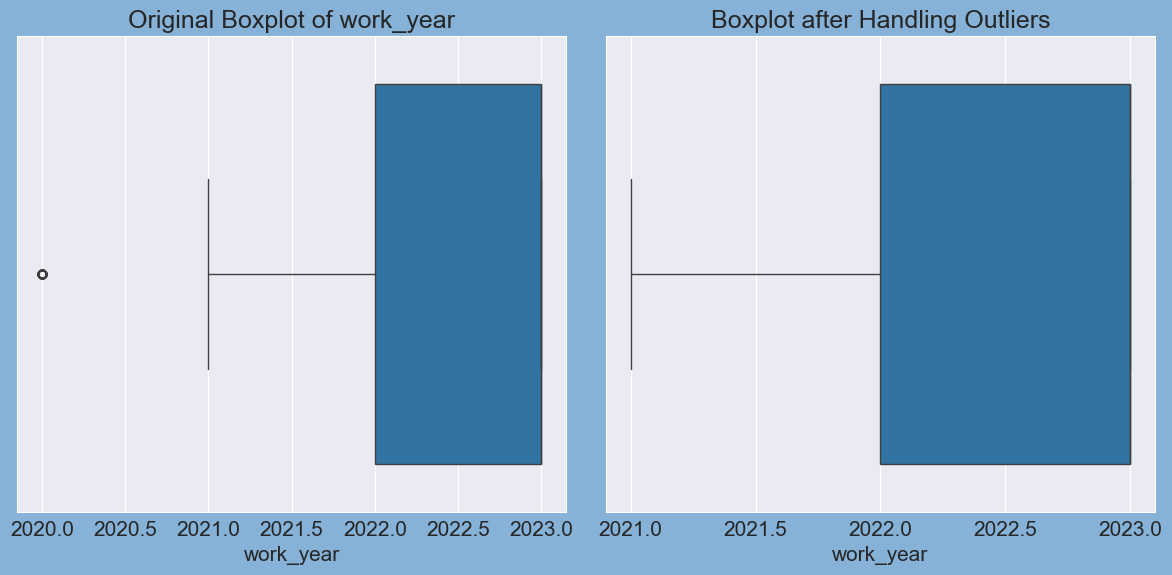

In [109]:
# Choose the feature for analysis (in this case, "age")
feature = "work_year"

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the original boxplot
sns.boxplot(x=data[feature], ax=axes[0])
axes[0].set_title(f"Original Boxplot of {feature}")

# Identify and handle outliers
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Plot the boxplot after handling outliers
sns.boxplot(x=filtered_data[feature], ax=axes[1])
axes[1].set_title(f"Boxplot after Handling Outliers")

# Display the plots
plt.tight_layout()
plt.show()

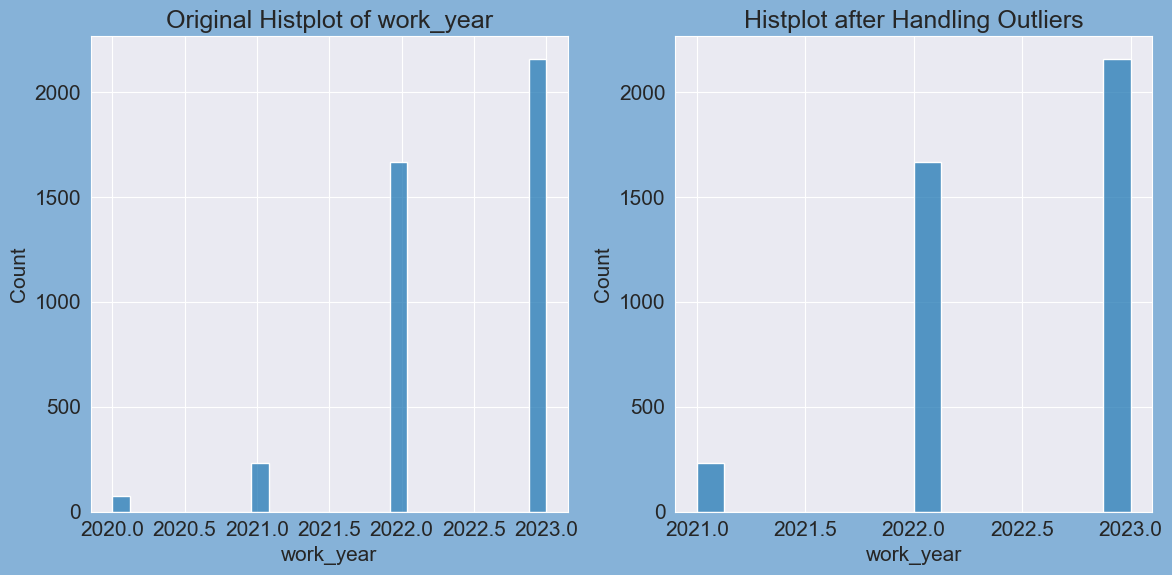

In [110]:
# Choose the feature for analysis (in this case, "age")
feature = "work_year"

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the original histplot
sns.histplot(x=data[feature], ax=axes[0])
axes[0].set_title(f"Original Histplot of {feature}")

# Identify and handle outliers
Q1 = data[feature].quantile(0.25)
Q3 = data[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Plot the boxplot after handling outliers
sns.histplot(x=filtered_data[feature], ax=axes[1])
axes[1].set_title(f"Histplot after Handling Outliers")

# Display the plots
plt.tight_layout()
plt.show()

## TASK 4 : Univariate Analysis

### Subtask 4.1 : HISTPLOT

Minimum work_year: 2020
Maximum work_year: 2023


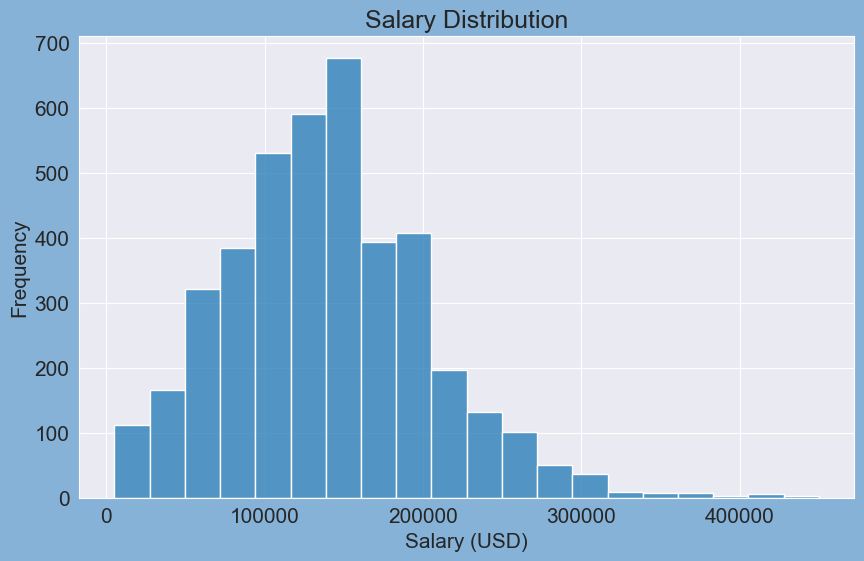

In [111]:
# 1. HISTOGRAM - sns.histplot()
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=20)
print("Minimum work_year:",data['work_year'].min())
print("Maximum work_year:",data['work_year'].max())
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

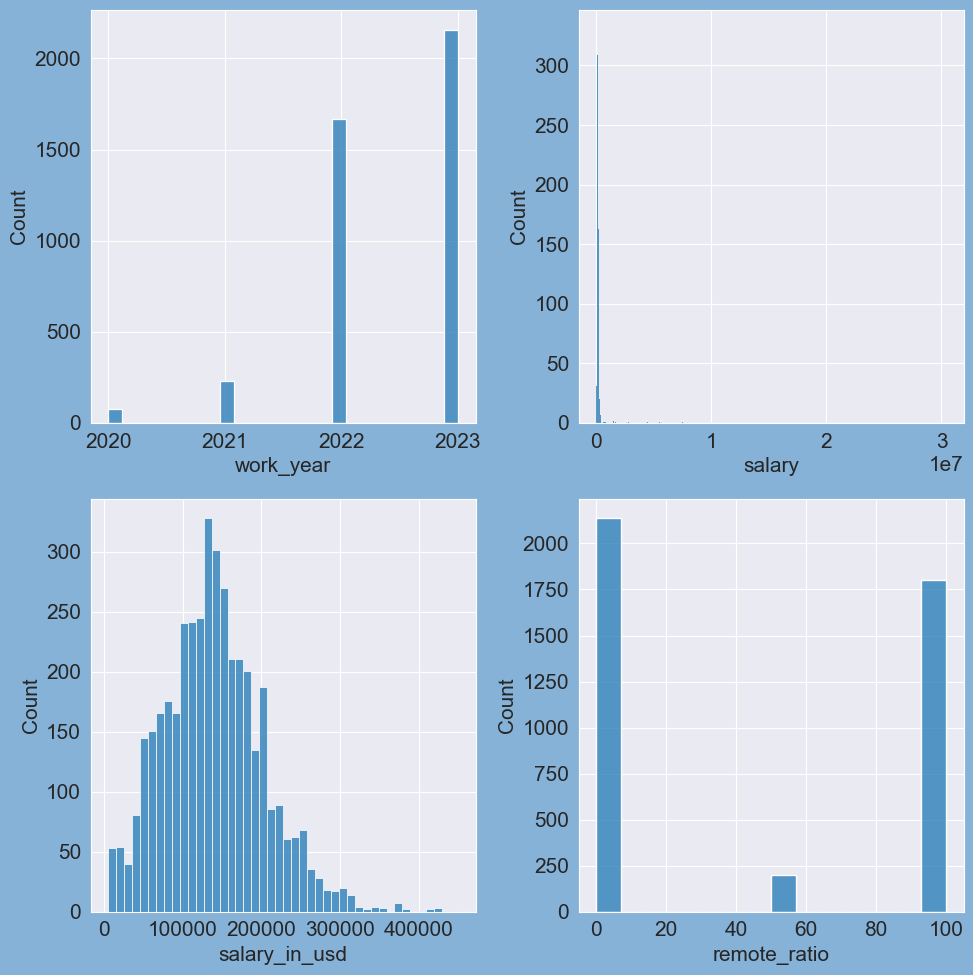

In [112]:
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = data[col], ax = ax)

fig.tight_layout()
plt.show()

### Subtask 4.2 : KDE PLOT

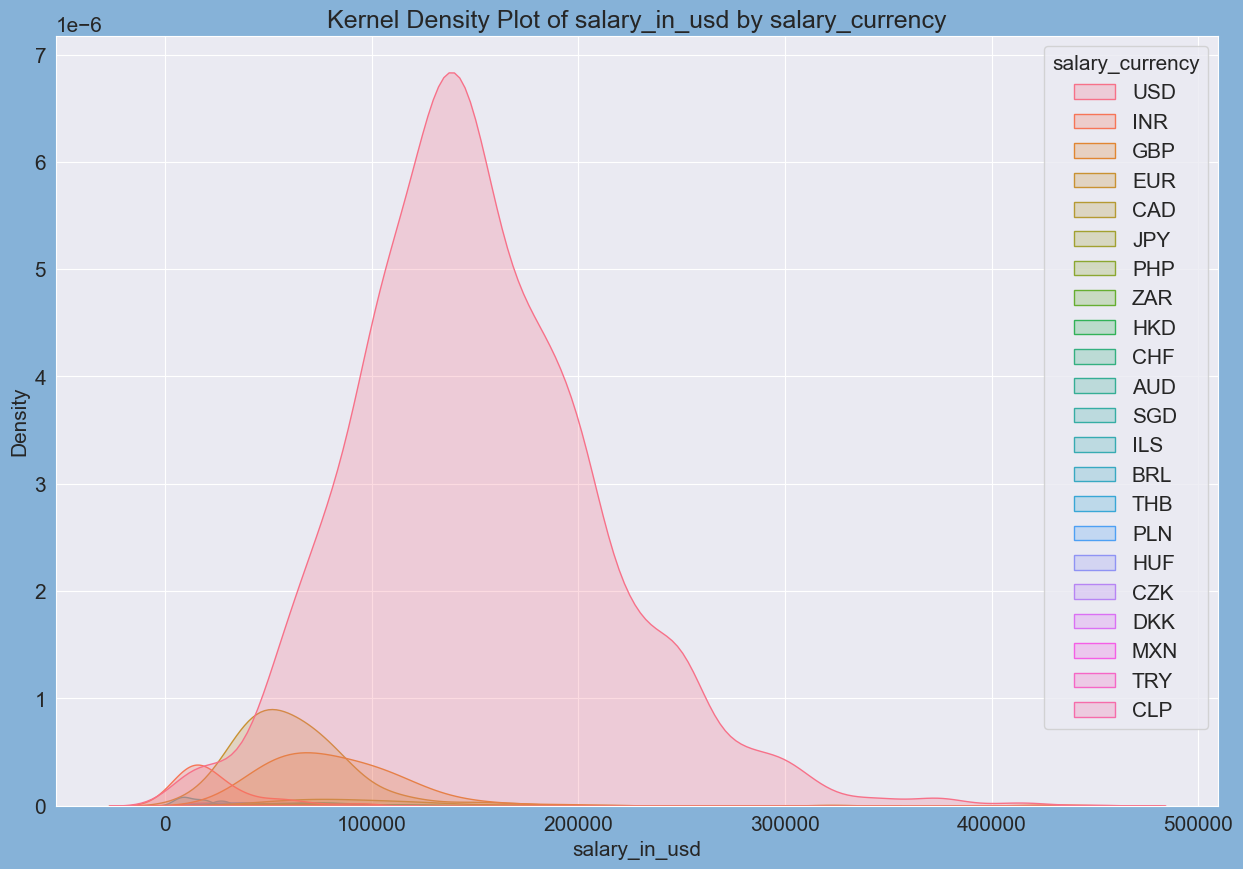

In [113]:
# 2. KDE PLOT - Kernal Density Plot - sns.kdeplot()
fig,ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(x='salary_in_usd', data=data, hue='salary_currency',fill = True)
plt.xlabel('salary_in_usd')
plt.title('Kernel Density Plot of salary_in_usd by salary_currency')
plt.show()

<AxesSubplot:xlabel='work_year', ylabel='Density'>

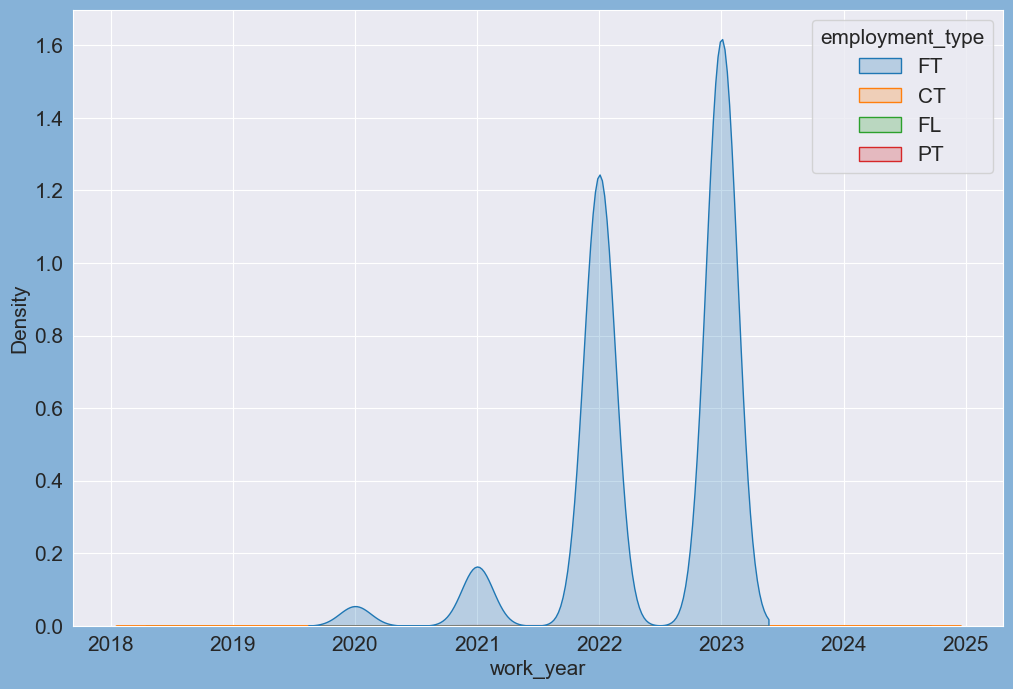

In [114]:
#KDE-Plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=data,x='work_year',hue='employment_type',fill=True)

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

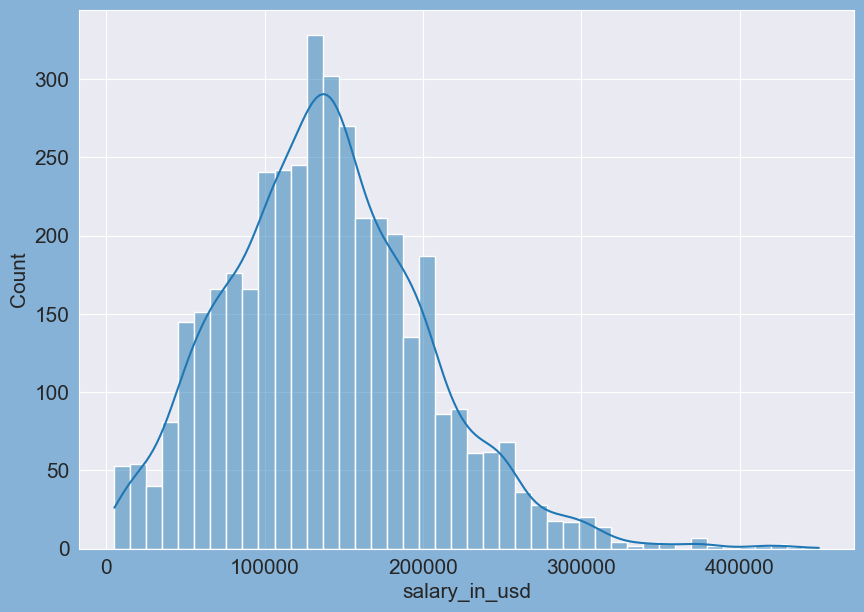

In [115]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='salary_in_usd', data=data, kde=True)

### Subtask 4.3 :  RUG PLOT

<AxesSubplot:xlabel='work_year', ylabel='Count'>

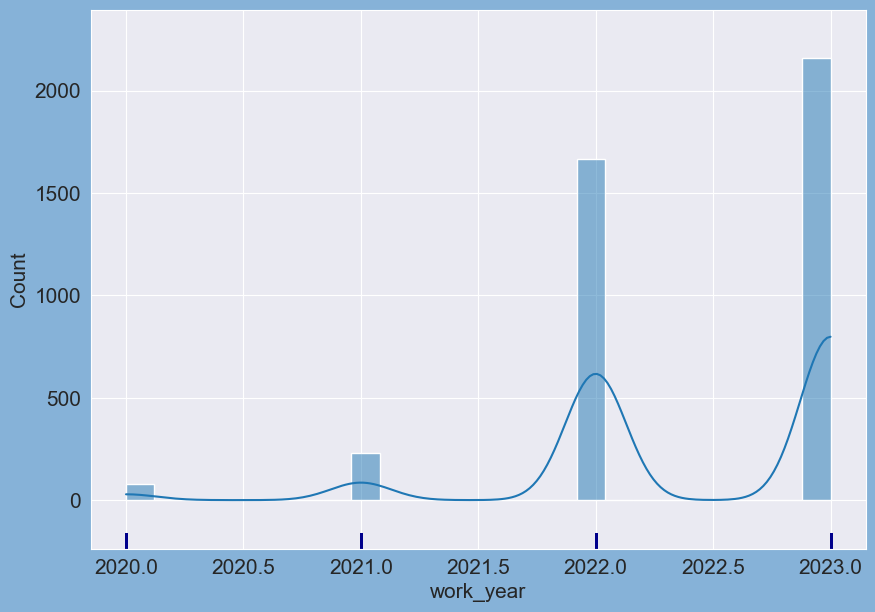

In [116]:
# 3. RUG PLOT - sns.rugplot()
sns.rugplot(x='work_year', data=data, height=.03, color='darkblue')
sns.histplot(x='work_year', data=data, kde=True)

### Subtask 4.4 : BOX PLOT

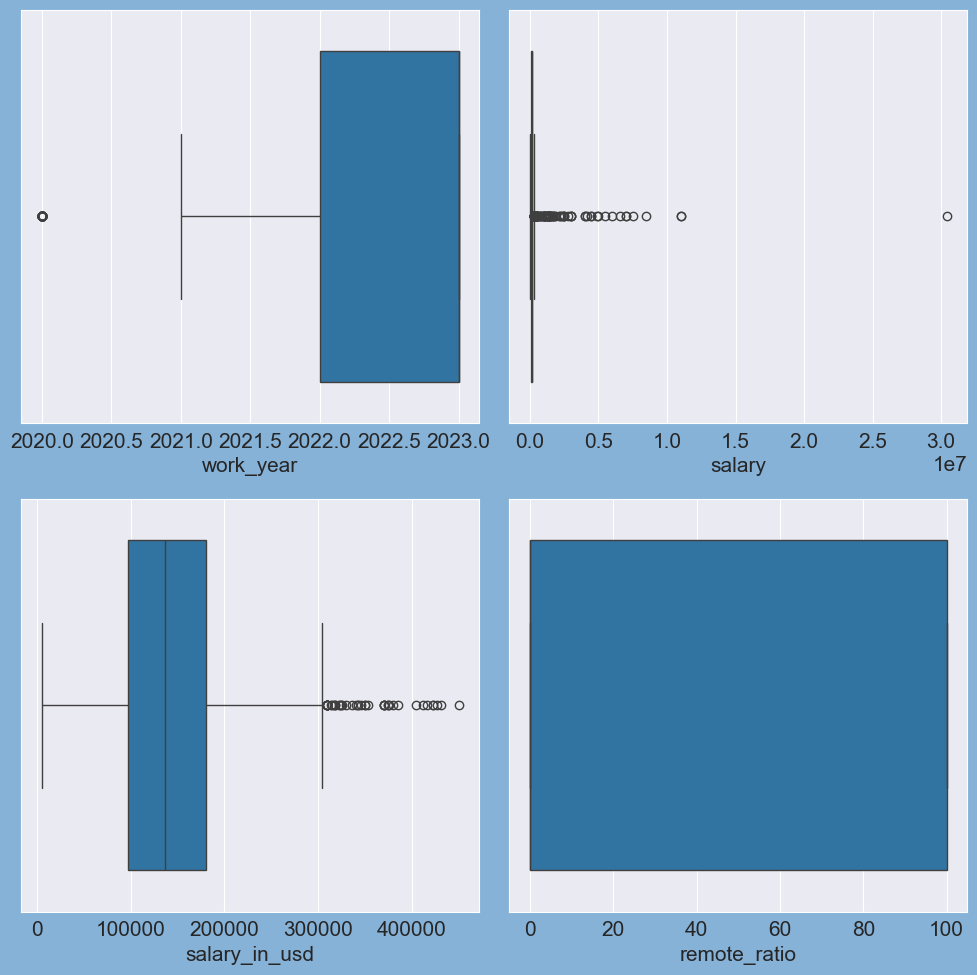

In [117]:
# 4. BOX PLOTS - sns.boxplot()
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.boxplot(x = data[col], ax = ax)

fig.tight_layout()
plt.show()

### Subtask 4.5 : VIOLIN PLOT

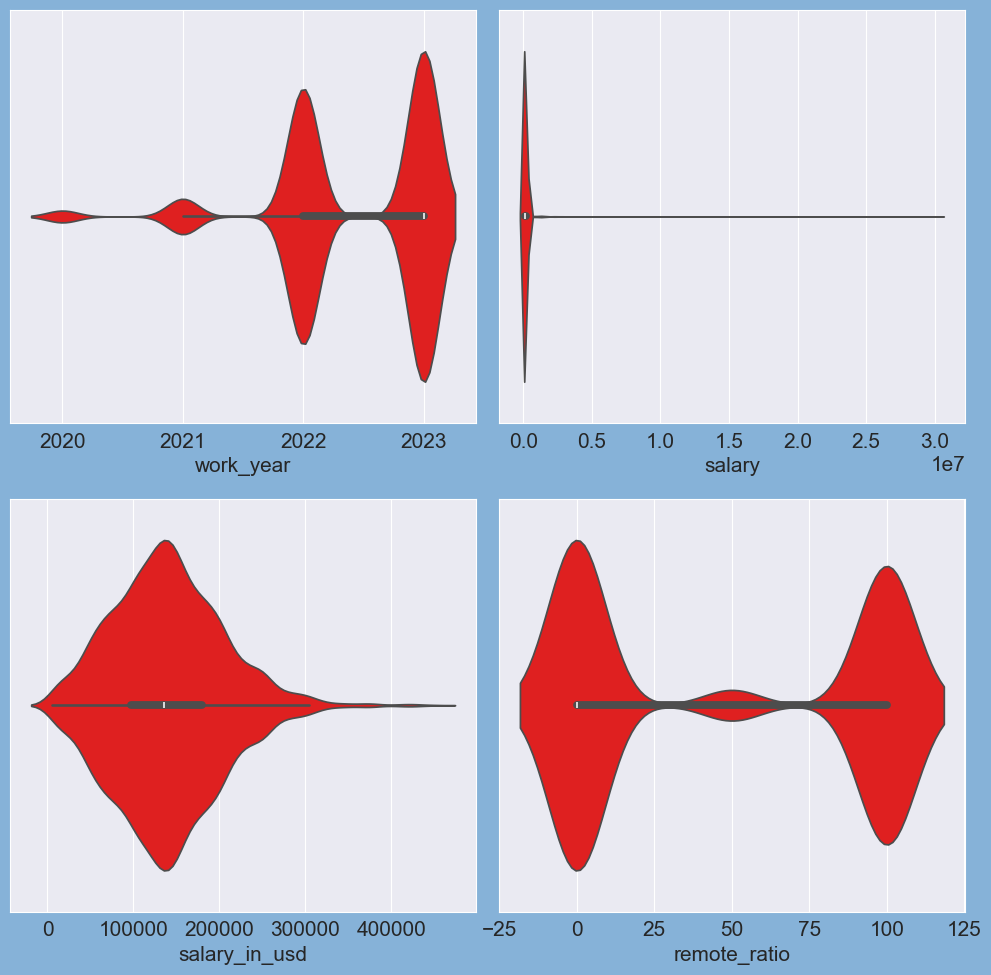

In [118]:
#Violin Plot - sns.violinplot()
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.violinplot(x = data[col], ax = ax,color='red')

fig.tight_layout()
plt.show()

### Subtask 4.6 : STRIP PLOT

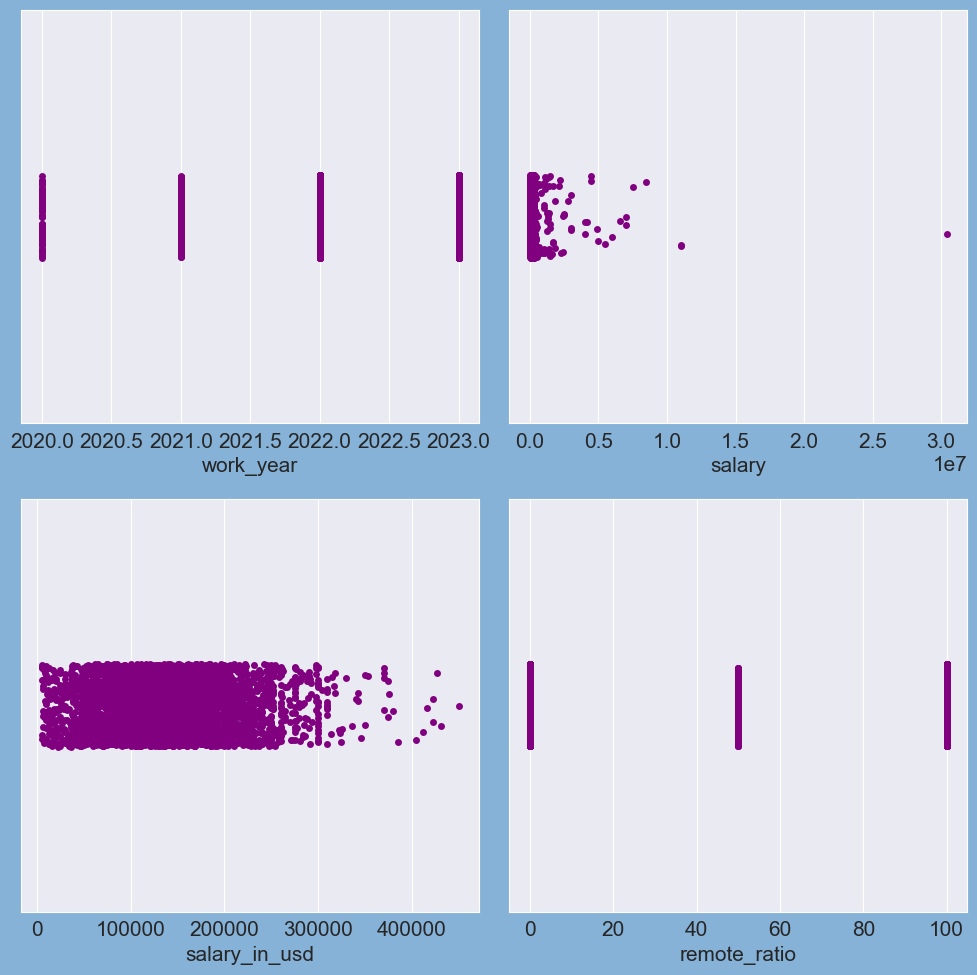

In [119]:
#Strip plot()
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:
    ax=fig.add_subplot(rows,cols,i+1)

    sns.stripplot(x = data[col], ax = ax , color='purple')

fig.tight_layout()
plt.show()

### Subtask 4.7 : CATEGORIAL FEATURES

In [120]:
# CATEGORICAL FEATURES
data.describe(include='object')

experience_level employment_type      job_title salary_currency  \
count              4134            4134           4134            4134   
unique                4               4             99              22   
top                  SE              FT  Data Engineer             USD   
freq               2791            4093           1124            3573   

       employee_residence company_location company_size  
count                4134             4134         4134  
unique                 80               74            3  
top                    US               US            M  
freq                 3306             3346         3501

### Subtask 4.8 : COUNT PLOT

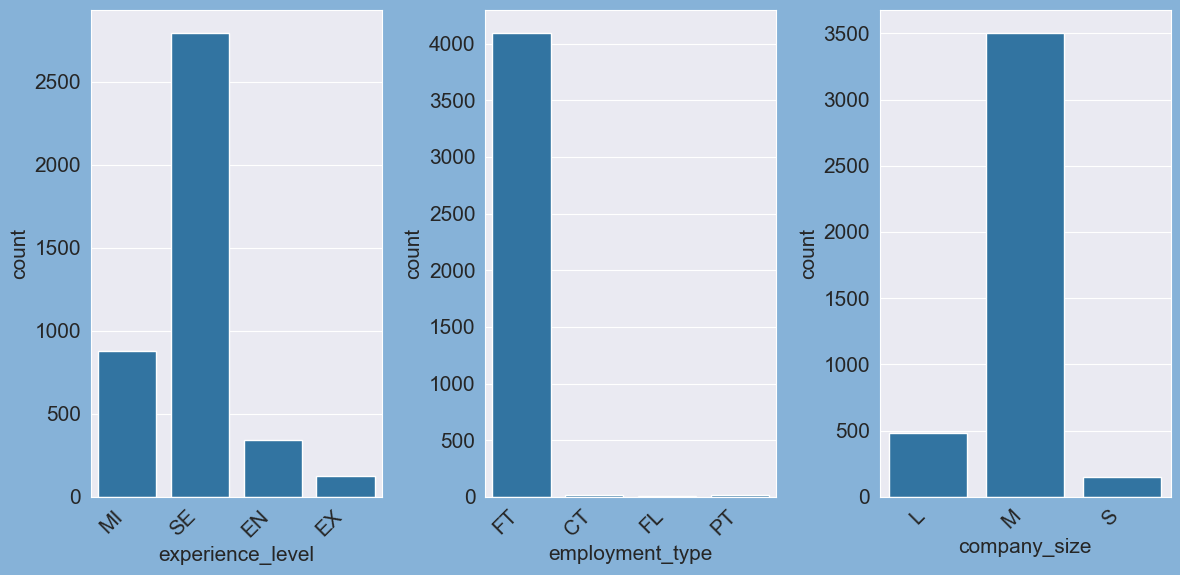

In [121]:
# 1. COUNT PLOT
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_categs = data.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):

    ax=fig.add_subplot(rows, cols, i+1)

    sns.countplot(x=data[col], ax=ax)

    plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

### Subtask 4.9 : PIE CHART

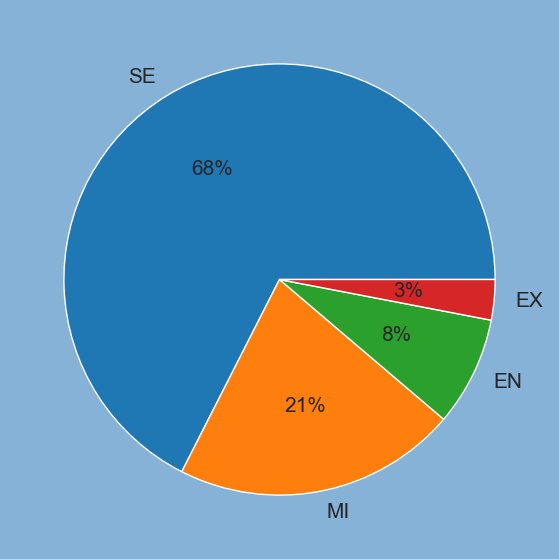

In [122]:
#PIE CHART
df = data['experience_level'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%");

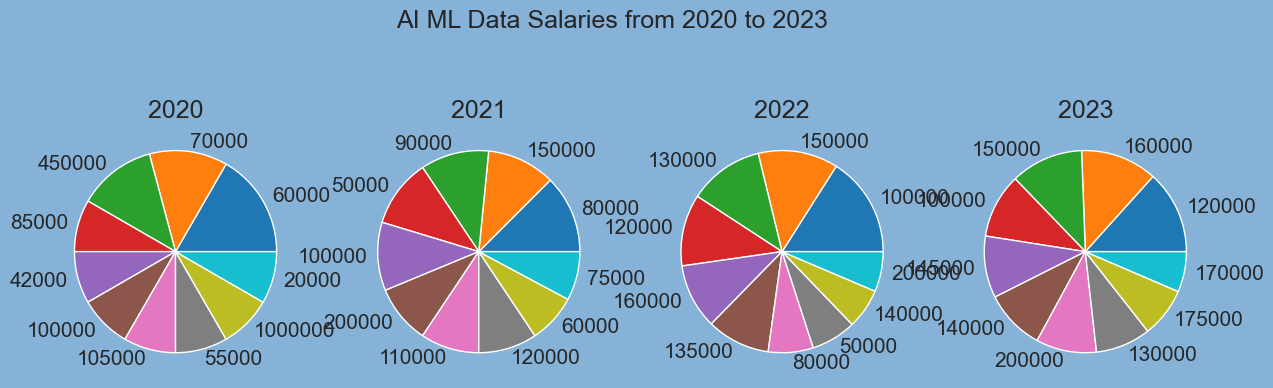

In [123]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, year in enumerate([2020, 2021, 2022, 2023]):
    work_yearly = data[data['work_year'] == year]['salary'].value_counts()[:10]
    axs[i].pie(work_yearly.values, labels=work_yearly.index)
    axs[i].set_title(f" {year} ")
fig.suptitle('AI ML Data Salaries from 2020 to 2023')
plt.show()

## TASK 5: BIVARIATE ANALYSIS

### Subtask 5.1 : Scatter Plot

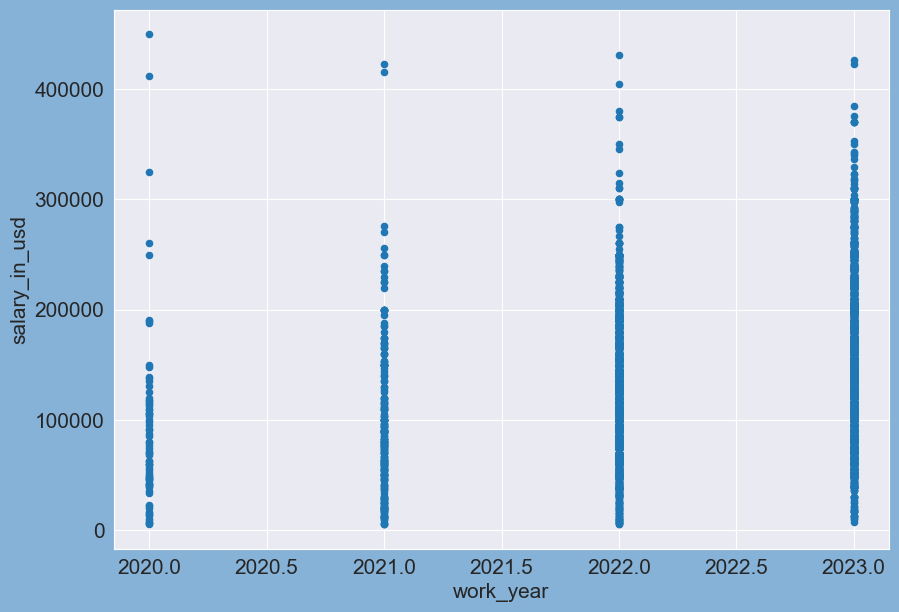

In [124]:
data.plot.scatter(x="work_year",y="salary_in_usd")
plt.show()

### Subtask 5.2 : Line chart

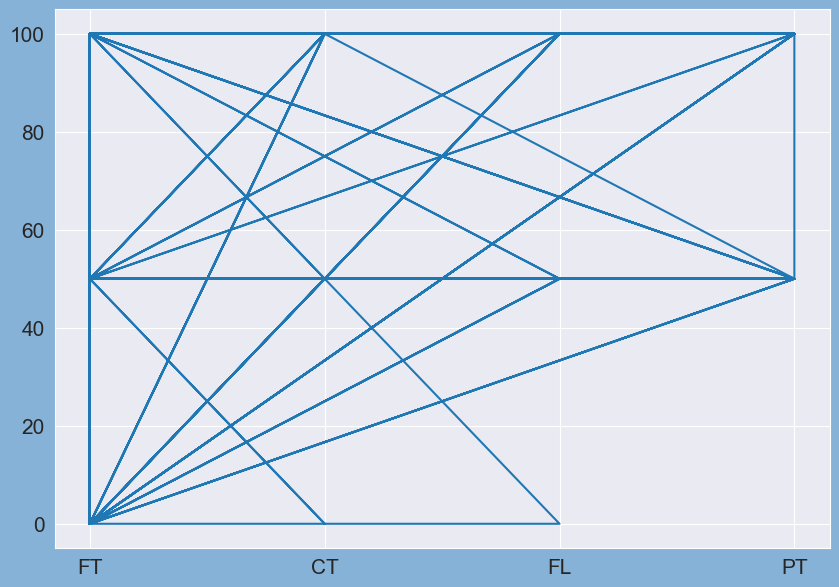

In [125]:
x = data.employment_type
y = data.remote_ratio
plt.plot(x, y)
plt.show()

### Subtask 5.3 : Heat Map

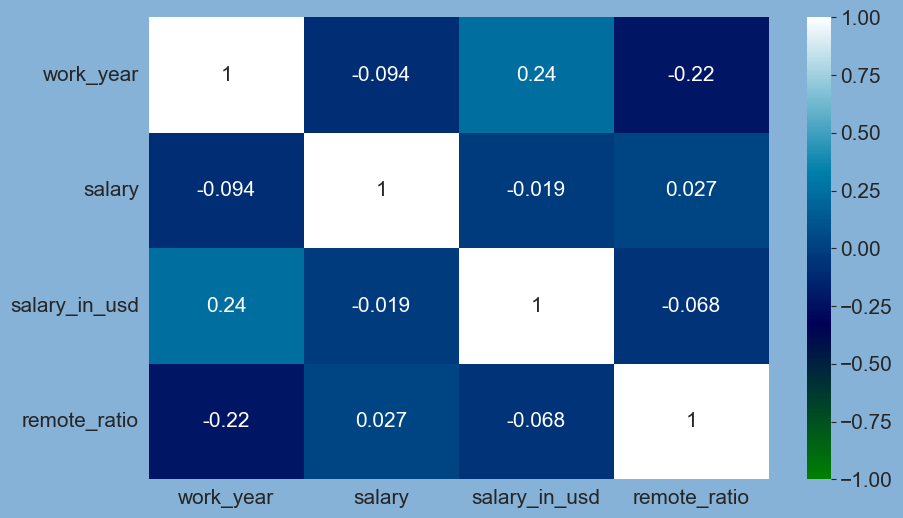

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(['job_title','experience_level'],axis=1).corr(), annot = True, cmap = 'ocean',vmin = -1, vmax = 1)
plt.show()

### Subtask 5.4 : Hexbin Plot

<AxesSubplot:xlabel='remote_ratio', ylabel='work_year'>

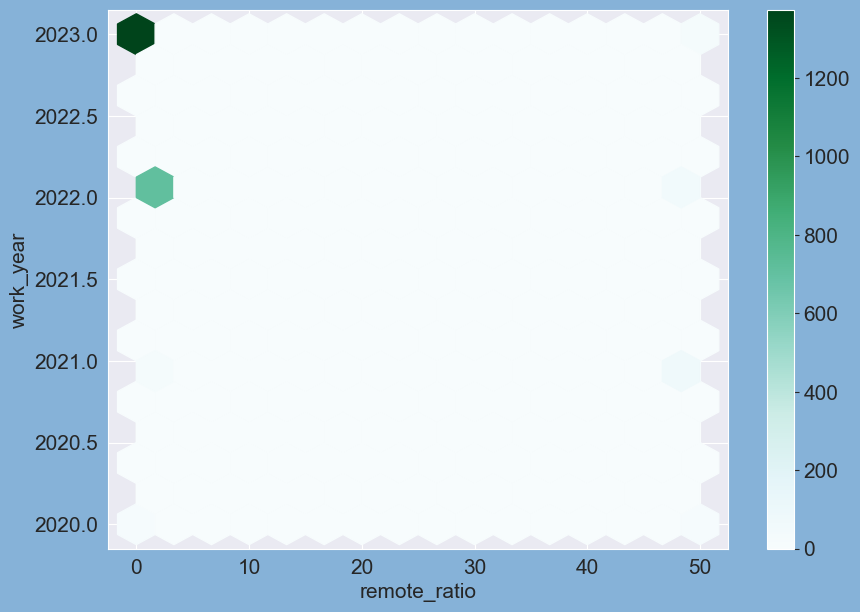

In [131]:
data[data['remote_ratio'] < 100].plot.hexbin(x='remote_ratio', y='work_year', gridsize=15)

### Subtask 5.5 :  BOX PLOT

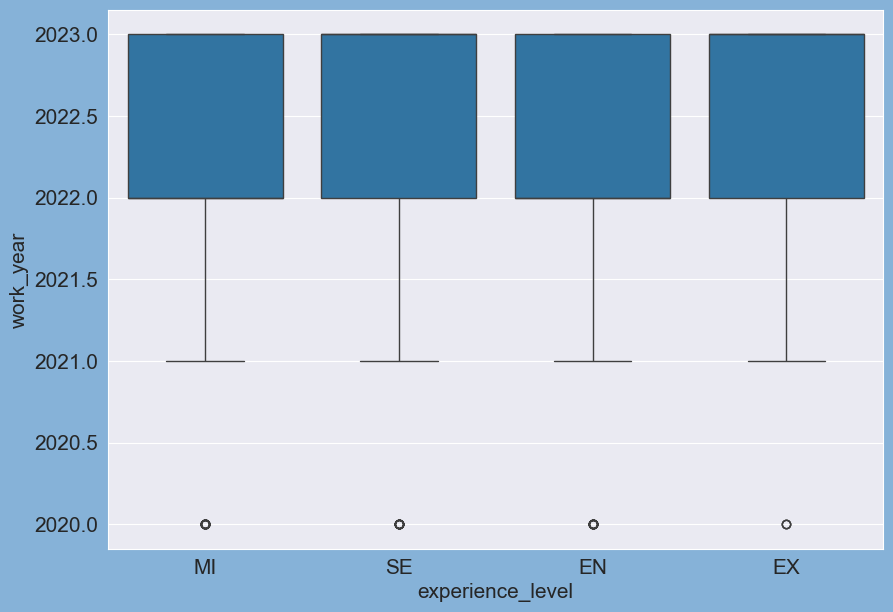

In [132]:
sns.boxplot(data=data, x="experience_level", y="work_year")
plt.show()

### Subtask 5.6 : Violin Plot

<AxesSubplot:xlabel='work_year', ylabel='experience_level'>

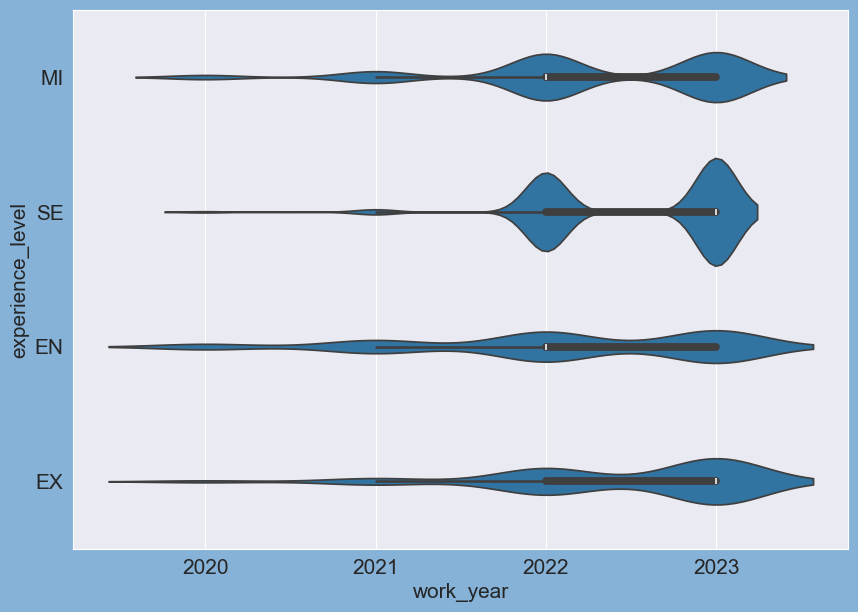

In [135]:
sns.violinplot(x=data["work_year"], y=data["experience_level"])

## TASK 6: MULTIVARIATE ANALYSIS

### Subtask 6.1 : Pair plot

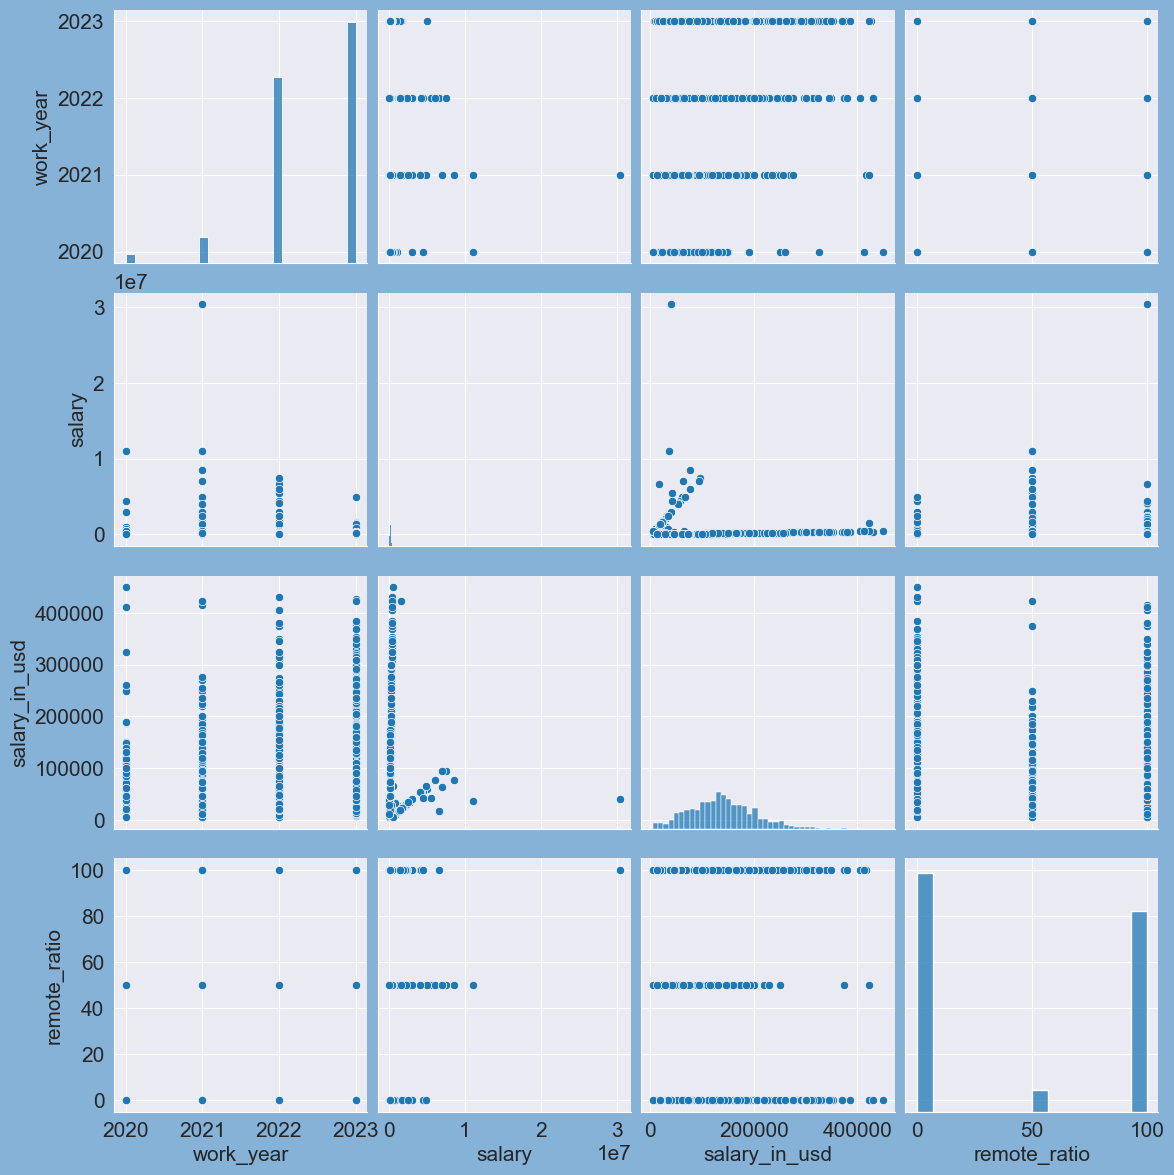

In [49]:
sns.pairplot(data=data, vars=["work_year","salary","salary_in_usd","remote_ratio"],size=3,markers=['o','s','H'])
plt.show()

## TASK 7 : Distributions

In [185]:
# block 1 - simple stats
mean1 = data['salary_in_usd'].mean()
sum1 = data['salary_in_usd'].sum()
max1 = data['salary_in_usd'].max()
min1 = data['salary_in_usd'].min()
count1 = data['salary_in_usd'].count()
median1 = data['salary_in_usd'].median() 
std1 = data['salary_in_usd'].std() 
var1 = data['salary_in_usd'].var()  
avg = data['salary_in_usd'].mean()
# block 2 - group by
groupby_sum1 = data.groupby(['experience_level']).sum() 
groupby_count1 = data.groupby(['experience_level']).count()

# print block 1
print('mean salary_in_usd: ' + str(mean1))
print('sum of salary_in_usd: ' + str(sum1))
print('max salary_in_usd: ' + str(max1))
print('min salary_in_usd: ' + str(min1))
print('count of salary_in_usd: ' + str(count1))
print('median salary_in_usd: ' + str(median1))
print('std of salary_in_usd: ' + str(std1))
print('var of salary_in_usd: ' + str(var1))
print('average of salary_in_usd: ' +str(avg))

# print block 2
print('sum of values, grouped by the experience_level1: ' + str(groupby_sum1))
print('count of values, grouped by the experience_level1: ' + str(groupby_count1))

mean salary_in_usd: 139416.26439283986
sum of salary_in_usd: 576346837
max salary_in_usd: 450000
min salary_in_usd: 5132
count of salary_in_usd: 4134
median salary_in_usd: 136000.0
std of salary_in_usd: 63605.471999732385
var of salary_in_usd: 4045656068.30874
average of salary_in_usd: 139416.26439283986
sum of values, grouped by the experience_level1:                   work_year     salary  salary_in_usd  remote_ratio
experience_level                                                   
EN                   685493   67184310       26569673         18800
EX                   252805   30363847       24451380          6000
MI                  1777570  211426497       93908411         39600
SE                  5644853  474123651      431417373        125500
count of values, grouped by the experience_level1:                   work_year  employment_type  job_title  salary  \
experience_level                                                  
EN                      339              339        

### Subtask 7.1 : PDF (Probability Density Function) and CDF (Cumulative Density Function):

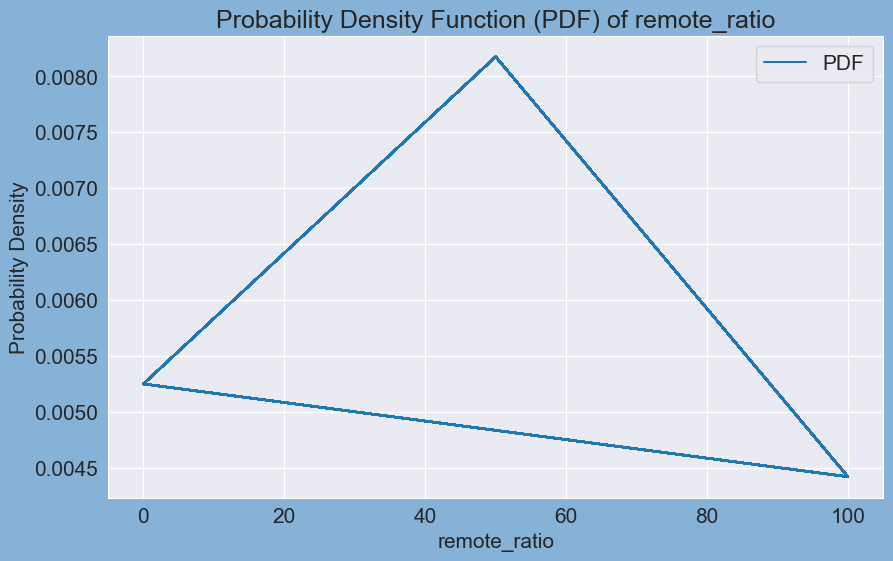

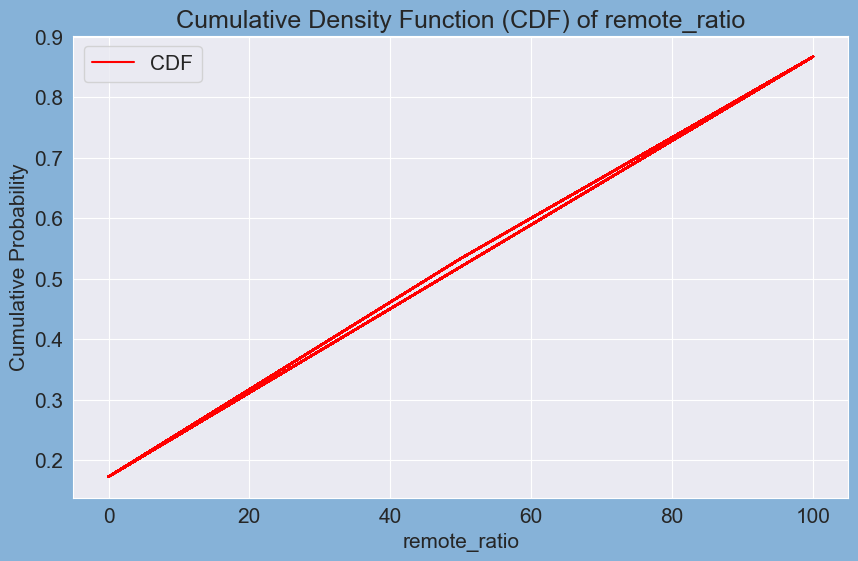

In [188]:
remote_ratio = data['remote_ratio']

# Calculate PDF
pdf = stats.norm.pdf(remote_ratio, loc=remote_ratio.mean(), scale=remote_ratio.std())

# Calculate CDF
cdf = stats.norm.cdf(remote_ratio, loc=remote_ratio.mean(), scale=remote_ratio.std())

# Plot PDF
plt.figure(figsize=(10,6))
plt.plot(remote_ratio, pdf, label='PDF')
plt.xlabel('remote_ratio')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of remote_ratio')
plt.legend()
plt.show()

# Plot CDF
plt.figure(figsize=(10,6))
plt.plot(remote_ratio, cdf, label='CDF', color='red')
plt.xlabel('remote_ratio')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Density Function (CDF) of remote_ratio')
plt.legend()
plt.show()

### SUBTASK 7.2: Normal/Gaussian Distribution:

**A normal distribution, also known as a Gaussian distribution, is a probability distribution that is symmetric and bell-shaped. It is characterized by two parameters: the mean (μ) and the standard deviation (σ).**

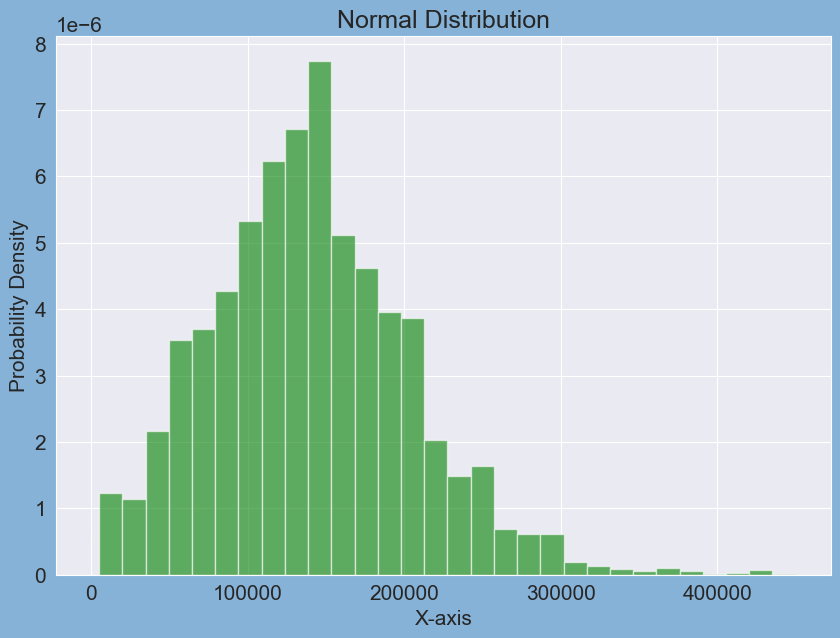

In [191]:
# Define the parameters of the normal distribution
mean = 139416.26439283986
std_dev = 63605.471999732385
sample = data.salary_in_usd

# Plot a histogram of the samples
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function
x = np.linspace(-5, 5, 100)
pdf = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-((x - mean)**2) / (2 * std_dev**2))
plt.plot(x, pdf, 'r--', lw=2)

plt.title("Normal Distribution")
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.show()

### SUBTASK 7.3 : UNIFORM DISTRIBUTION

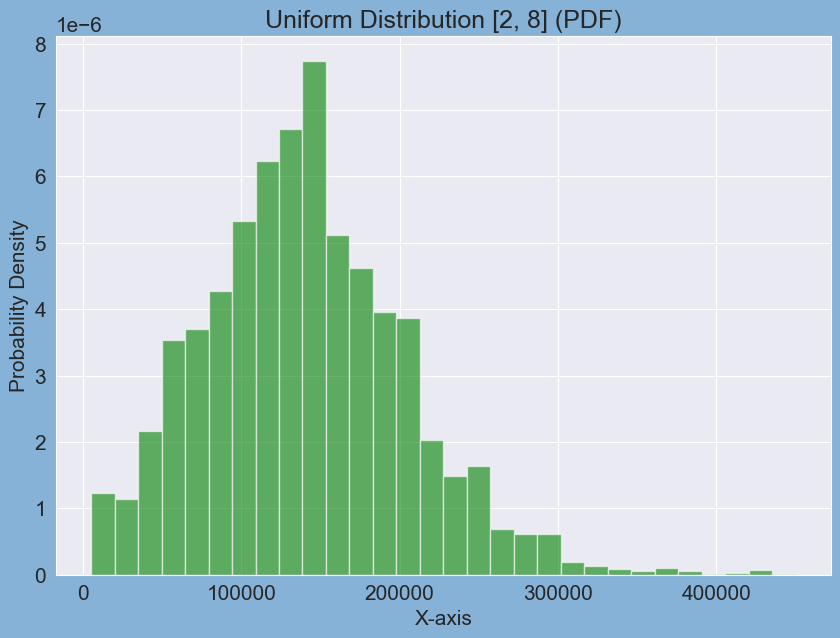

In [193]:
# Define the interval [a, b]
a = 2
b = 8

# Generate random samples from a uniform distribution
samples = data.salary_in_usd

# Create a histogram to visualize the PDF
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"Uniform Distribution [{a}, {b}] (PDF)")

# Show the plot
plt.show()

### SUBTASK 7.4 : CHI-SQUARE DISTRIBUTION

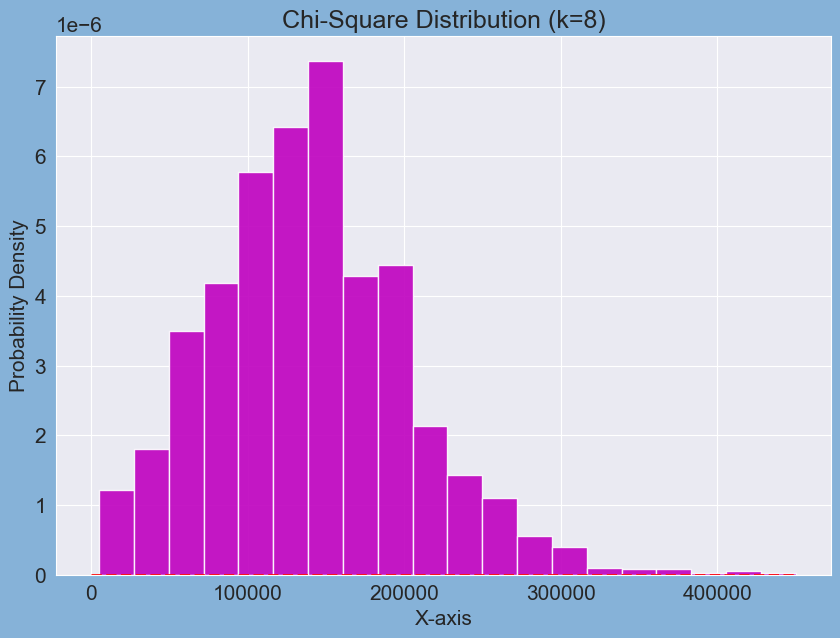

In [202]:

# Define the degrees of freedom (k)
k = 8  # Example: Degrees of freedom

# Generate random samples from a chi-square distribution
samples = data.salary_in_usd

# Create a histogram to visualize the distribution
plt.hist(samples, bins=20, density=True, alpha=0.9, color='m')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (1/(2**(k/2) * np.math.gamma(k/2))) * x**((k/2) - 1) * np.exp(-x/2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"Chi-Square Distribution (k={k})")

# Show the plot
plt.show()

### SUBTASK 7.5 : F-DISTRIBUTION

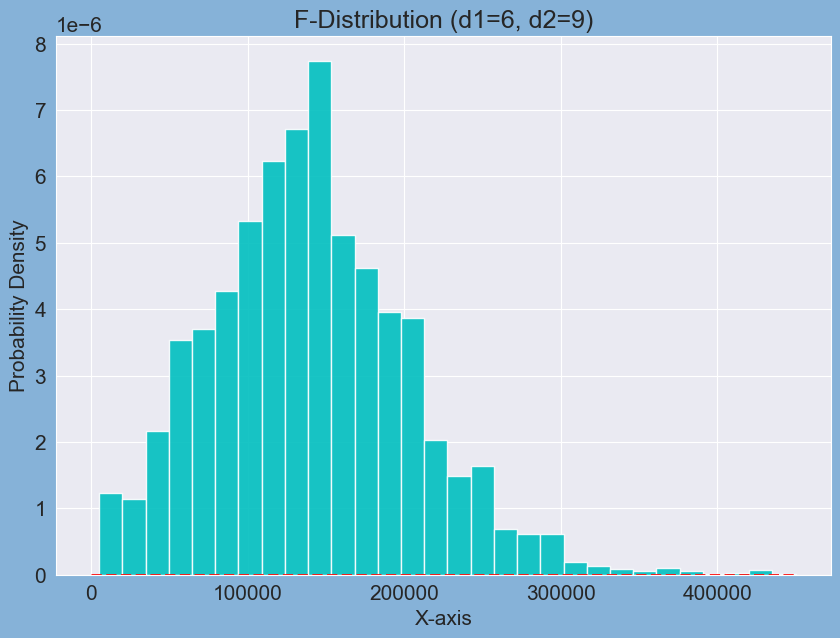

In [200]:

# Define the degrees of freedom parameters (d1 and d2)
d1 = 6  # Example: Degrees of freedom parameter 1
d2 = 9 # Example: Degrees of freedom parameter 2

# Generate random samples from an F-distribution
samples = data.salary_in_usd

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.9, color='c')

# Create the theoretical probability density function
x = np.linspace(0, max(samples), 100)
pdf = (np.math.gamma((d1 + d2) / 2) / (np.math.gamma(d1 / 2) * np.math.gamma(d2 / 2))) * (d1 / d2)**(d1 / 2) * x**(d1 / 2 - 1) * (1 + (d1 * x) / d2)**(-(d1 + d2) / 2)
plt.plot(x, pdf, 'r--', lw=2)

# Add labels and title to the plot
plt.xlabel("X-axis")
plt.ylabel("Probability Density")
plt.title(f"F-Distribution (d1={d1}, d2={d2})")

# Show the plot
plt.show()


## TASK 8 : Hypothesis Testing

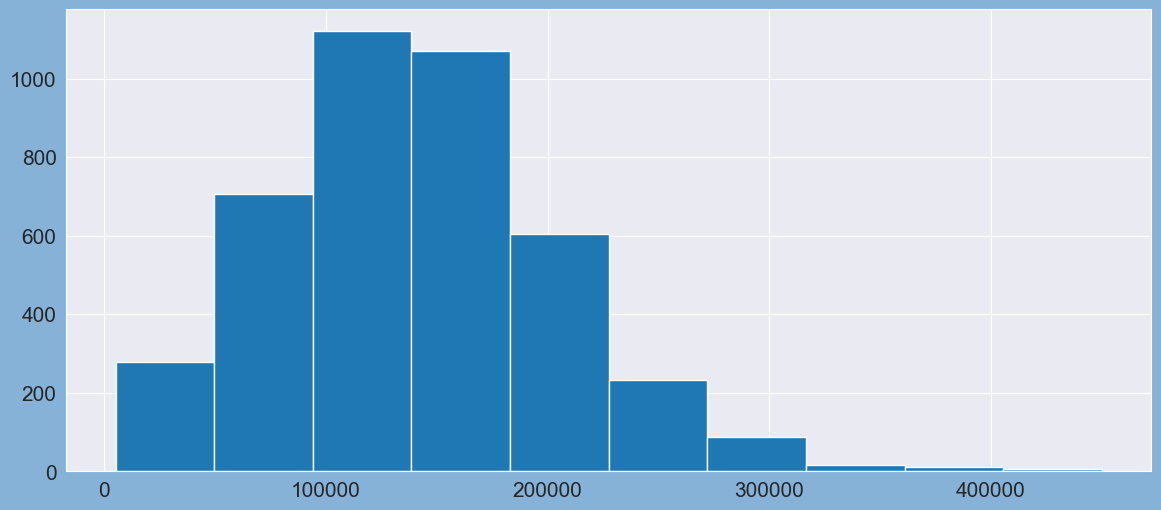

In [210]:
#Cheking Histogram
import matplotlib
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(data['salary_in_usd'])
plt.show()

### SUBTASK 8.1 : Normality test using K^2 Normality Test Test : tests If data is normally distributed 
**Assumption : Observations are identically distributed**

In [212]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = data['salary_in_usd']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=227.8691527034, p=0.0000000000
Not Normllay distributed


### SUBTASK 8.2 :Correlation Test - Pearson and Spearman’s Rank Correlation
**Asumption - Identical and Normal Distribution**

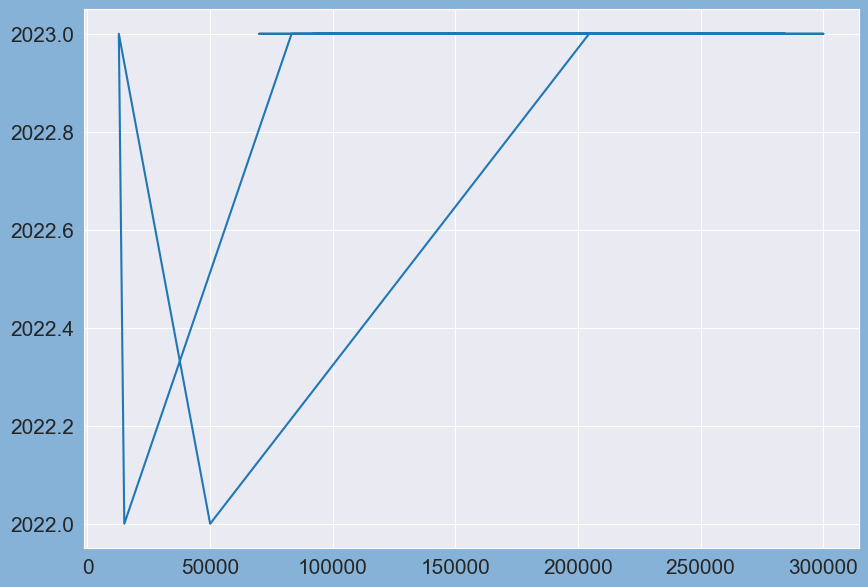

In [216]:
FirstSample = data[1:40]['salary_in_usd']
SecondSample = data[1:40]['work_year']

plt.plot(FirstSample,SecondSample)
plt.show()

In [214]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.08:
    print('independent samples')
else:
    print('dependent samples')

stat=0.407, p=0.028597
dependent samples


In [217]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.08:
    print('independent samples')
else:
    print('dependent samples')

stat=0.452, p=0.003874
dependent samples


In [218]:
data[1:40].corr(method="pearson")

work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000  0.236251       0.451938     -0.195029
salary          0.236251  1.000000       0.053402      0.119037
salary_in_usd   0.451938  0.053402       1.000000     -0.286541
remote_ratio   -0.195029  0.119037      -0.286541      1.000000

### SUBTASK 8.3 : Correlation of categorical variable - Chi square test

In [219]:
contingency_data = pd.crosstab(data['job_title'], data['experience_level'],margins = False)
contingency_data

experience_level               EN  EX  MI  SE
job_title                                    
3D Computer Vision Researcher   2   0   1   1
AI Developer                    5   0   2   3
AI Programmer                   2   0   0   0
AI Scientist                    7   1   6   3
AWS Data Architect              0   0   1   0
...                            ..  ..  ..  ..
Research Scientist             13   1  23  53
Sales Data Analyst              0   0   1   0
Software Data Engineer          0   0   1   1
Staff Data Analyst              0   1   0   0
Staff Data Scientist            0   0   0   1

[99 rows x 4 columns]

In [220]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.08:
    print('independent categories')
else:
    print('dependent categories')

stat=1481.624, p=0.000
dependent categories


### SUBTASK 8.4 : Parametic test 1- T-test

### SUBTASK 8.4.1 : One Sample T-test
**HO: Average Electric Range is 79.47
H1: Average Electric Range is not 79.47**

In [222]:
salary_in_usd_mean = np.mean(data.salary_in_usd)
print(salary_in_usd_mean)
tset, pval = ttest_1samp(data.salary_in_usd,79.47)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
	print(" we are rejecting null hypothesis")
else:
	print("we are accepting null hypothesis")

139416.26439283986
p-values 0.0
 we are rejecting null hypothesis


### SUBTASK 8.4.2 : Independent Sample T-test
**H0: THere is association between Electric_Range and Model_Year
H1: There is not any association between electric_Range and Model_Year**

In [223]:
from scipy.stats import ttest_ind

salary_in_usd_mean = np.mean(data.salary_in_usd)
work_year_mean = np.mean(data.work_year)
print("salary in usd mean value:",salary_in_usd_mean)
print("work year mean value:",work_year_mean)
salary_in_usd_std = np.std(data.salary_in_usd)
work_year_std = np.std(data.work_year)
print("salary in usd std value:",salary_in_usd_std)
print("work Year std value:",work_year_std)
ttest,pval = ttest_ind(data.salary_in_usd,data.work_year)
print("p-value",pval)
if pval <0.08:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

salary in usd mean value: 139416.26439283986
work year mean value: 2022.4288824383164
salary in usd std value: 63597.778564929555
work Year std value: 0.6844374545128745
p-value 0.0
we reject null hypothesis


### SUBTASK 8.5 : Parametic test 2 - Anova - Tests whether the means of two or more independent samples are significantly different.

In [230]:
import scipy
tstat, p = scipy.stats.f_oneway(data.salary_in_usd, data.work_year, data.remote_ratio)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.02:
    print('Same distribution')
else:
    print('Different distributions')

stat=1481.624, p=0.000
Different distributions


### SUBTASK 8.6 : Non Parametric test 1

### SUBTASK 8.6.1 :Mann-Whitney U Test-Tests whether the distributions of two or more independent samples are equal or not.

In [233]:
import scipy
tstat, p = scipy.stats.mannwhitneyu(data.salary_in_usd, data.remote_ratio)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.02:
    print('Same distribution')
else:
    print('Different distributions')

stat=1481.624, p=0.000
Different distributions


### SUBTASK 8.6.2 : Wilcoxon Signed-Rank Test
Tests whether the distributions of two paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.
Interpretation

**H0: the distributions of both samples are equal.
H1: the distributions of both samples are not equal.**

In [235]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(data.salary_in_usd, data.remote_ratio)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


### SUBTASK 8.6.3 : Kruskal-Wallis H Test
Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Interpretation

**H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.**

In [236]:
from scipy.stats import kruskal

stat, p = kruskal(data.salary_in_usd, data.remote_ratio)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=6376.158, p=0.000
Probably different distributions


### SUBTASK 8.6.4 : Friedman Test
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.
Interpretation

**H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.**

In [238]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(data.salary_in_usd, data.remote_ratio, data.work_year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=8268.000, p=0.000
Probably different distributions


### SUBTASK 8.7 : Test of Stationarity - very Important for time series analysis

### SUBTASK 8.7.1 :Augmented Dickey-Fuller Test

**null hypothesis - Series is non stationary**

Definition of stationary time series - constant mean and variance

In [239]:
from statsmodels.tsa.stattools import adfuller
salary_in_usd_data = data.salary_in_usd
stat, p, lags, obs, crit, t = adfuller(salary_in_usddata)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

stat=-6.958, p=0.000
Series is stationary


# Questions/Answers

# Salary Trends
### 1.What is the average salary for each job title?

In [50]:
# Get the unique job titles
unique_job_titles = data['job_title'].unique()

# Calculate and display the average salary for each job title
for job_title in unique_job_titles:
    avg_salary = data[data['job_title'] == job_title]['salary_in_usd'].mean()
    print(f"Average salary for '{job_title}': ${avg_salary:.2f}")

Average salary for 'AWS Data Architect': $258000.00
Average salary for 'Data Scientist': $142789.00
Average salary for 'Data Engineer': $143643.72
Average salary for 'Applied Scientist': $187586.23
Average salary for 'ML Engineer': $165104.82
Average salary for 'Data Analyst': $109201.69
Average salary for 'Machine Learning Engineer': $158594.40
Average salary for 'Data Manager': $114908.65
Average salary for 'Product Data Analyst': $60384.57
Average salary for 'Autonomous Vehicle Operations Lead': $15000.00
Average salary for 'Applied Machine Learning Engineer': $118730.75
Average salary for 'Analytics Engineer': $155577.86
Average salary for 'ETL Developer': $134198.83
Average salary for 'Business Intelligence Engineer': $167283.33
Average salary for 'BI Data Analyst': $60987.06
Average salary for 'Machine Learning Developer': $72703.50
Average salary for 'Research Engineer': $171353.18
Average salary for 'Data Integration Specialist': $57950.00
Average salary for 'Data Architect': $

### 2.How does the average salary change with different levels of experience?

  experience_level  salary_in_usd
0               EN   78376.616519
1               EX  195611.040000
2               MI  106835.507395
3               SE  154574.479756


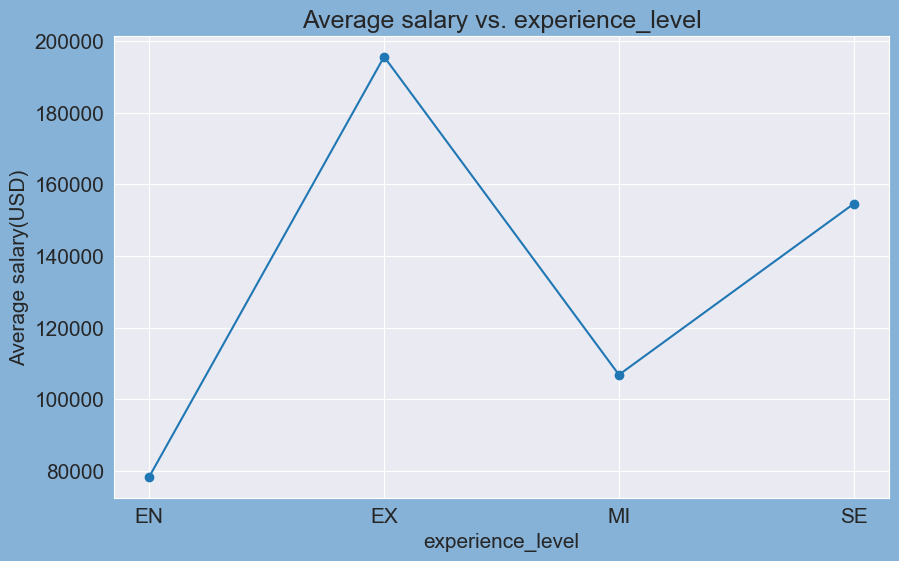

In [51]:
#2
# Group the data by experience level and calculate the mean salary for each group
average_salary_by_experience = data.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Display the result
print(average_salary_by_experience)
# Create a plot to visualize the change in average salary with different levels of experience
plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_experience['experience_level'], average_salary_by_experience['salary_in_usd'], marker='o')
plt.title('Average salary vs. experience_level')
plt.xlabel('experience_level')
plt.ylabel('Average salary(USD)')
plt.grid(True)

# Show the plot
plt.show()


### 3.What is the salary distribution within each company size category (small, medium, large)?

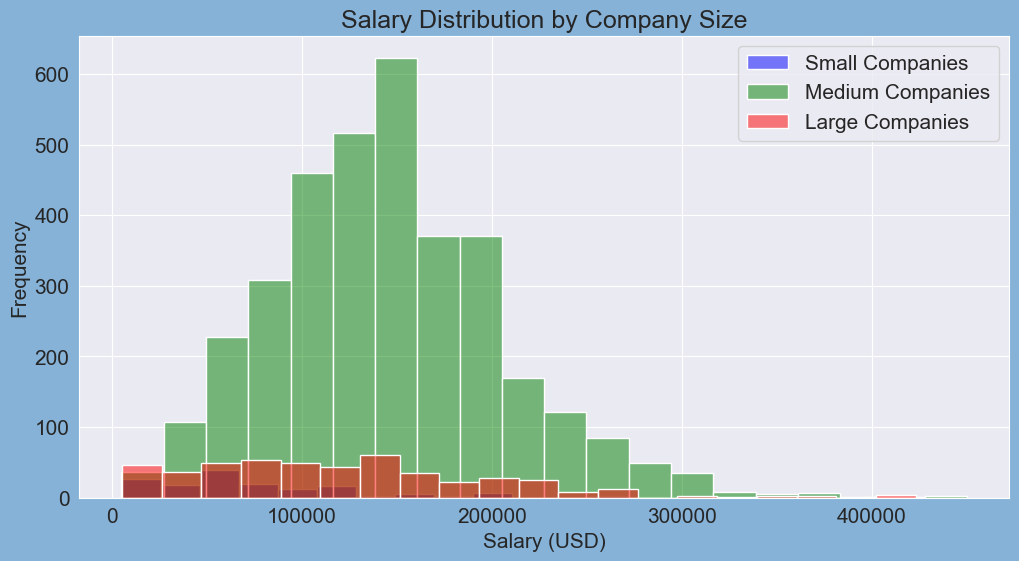

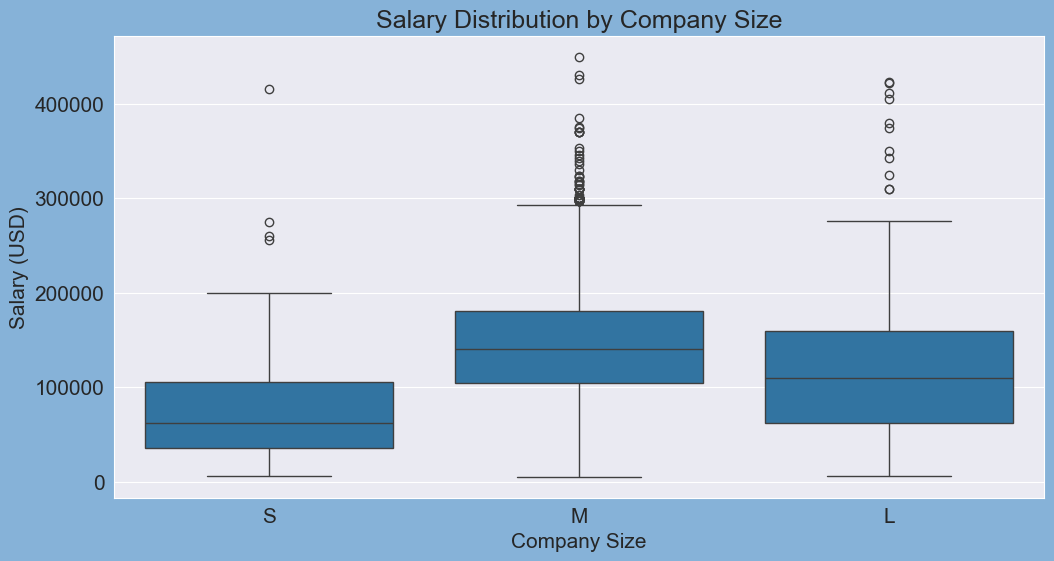

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for each company size category
small_companies = data[data['company_size'] == 'S']
medium_companies = data[data['company_size'] == 'M']
large_companies = data[data['company_size'] == 'L']

# Create histograms for each company size category
plt.figure(figsize=(12, 6))
sns.histplot(small_companies['salary_in_usd'], bins=20, label='Small Companies', color='blue', alpha=0.5)
sns.histplot(medium_companies['salary_in_usd'], bins=20, label='Medium Companies', color='green', alpha=0.5)
sns.histplot(large_companies['salary_in_usd'], bins=20, label='Large Companies', color='red', alpha=0.5)

plt.title('Salary Distribution by Company Size')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=data, order=['S', 'M', 'L'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()


# Experience Level
### 4.Which experience levels are most common in this dataset?


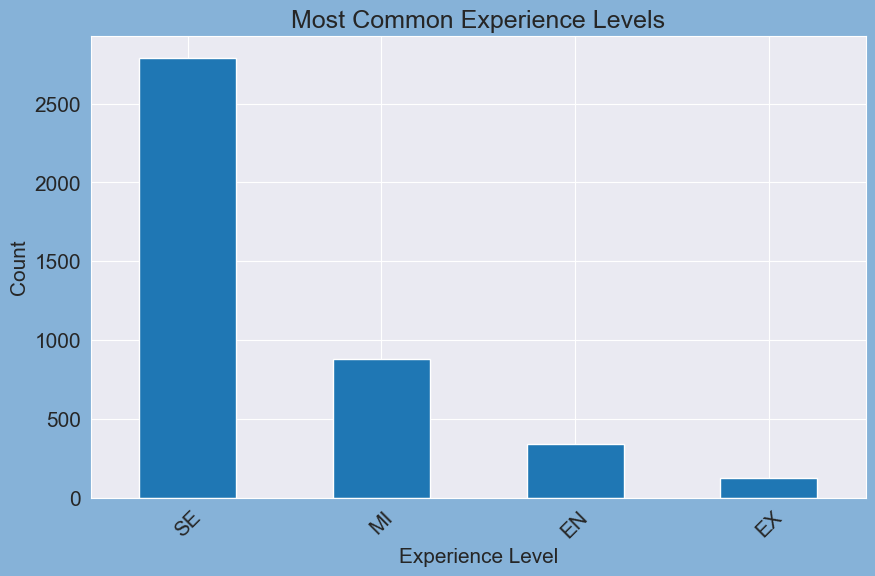

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming you've already loaded it)
# data = pd.read_csv("salaries.csv")

# Count the occurrences of each experience level
experience_level_counts = data['experience_level'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
experience_level_counts.plot(kind='bar')
plt.title('Most Common Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 5. Are certain job titles associated more with specific experience levels?

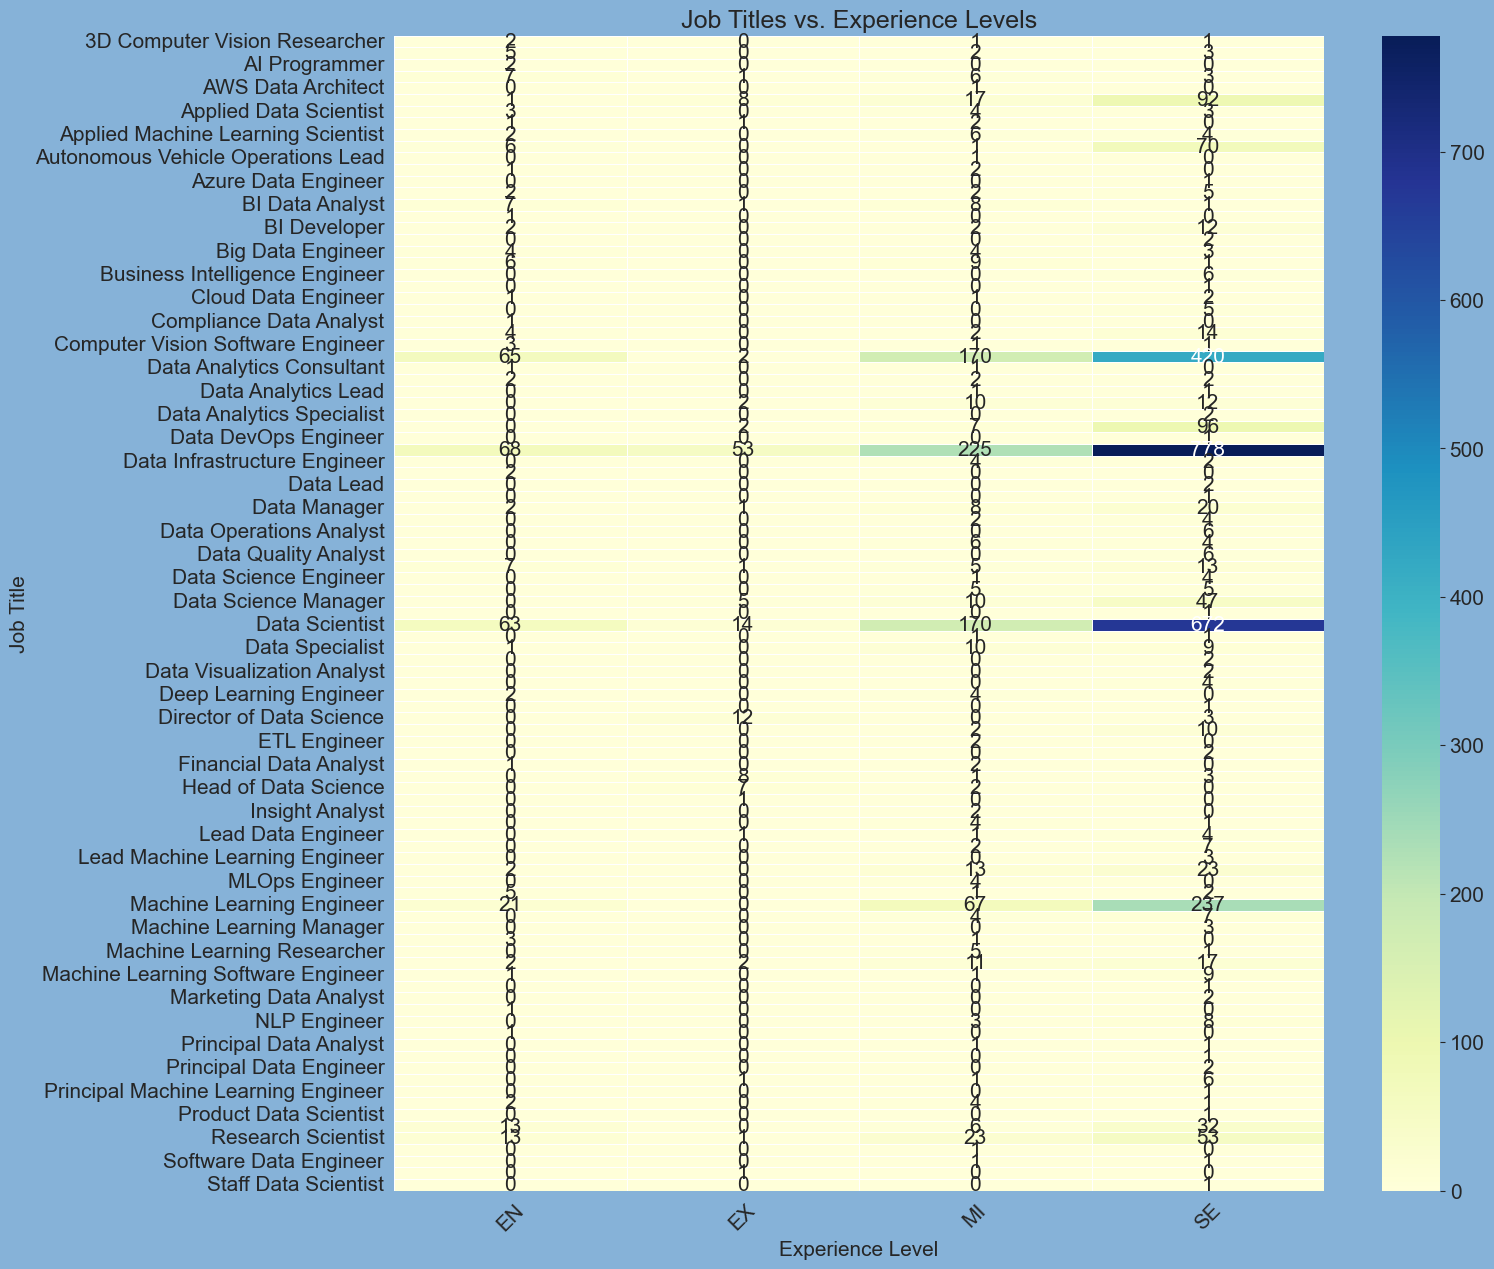

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the frequency of each combination of job title and experience level
pivot_table = data.pivot_table(index='job_title', columns='experience_level', aggfunc='size', fill_value=0)

# Create a heatmap to visualize the associations
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Job Titles vs. Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()


### 6.How does employment type (full-time, part-time, etc.) affect the salary?

                          mean    median            std    min     max  count
employment_type                                                              
CT               123107.076923   83200.0  128733.786565   7500  416000     13
FL                52552.545455   50000.0   28056.088791  12000  100000     11
FT               140116.351332  136000.0   62983.078569   5132  450000   4093
PT                39537.705882   21669.0   38309.735386   5409  125404     17


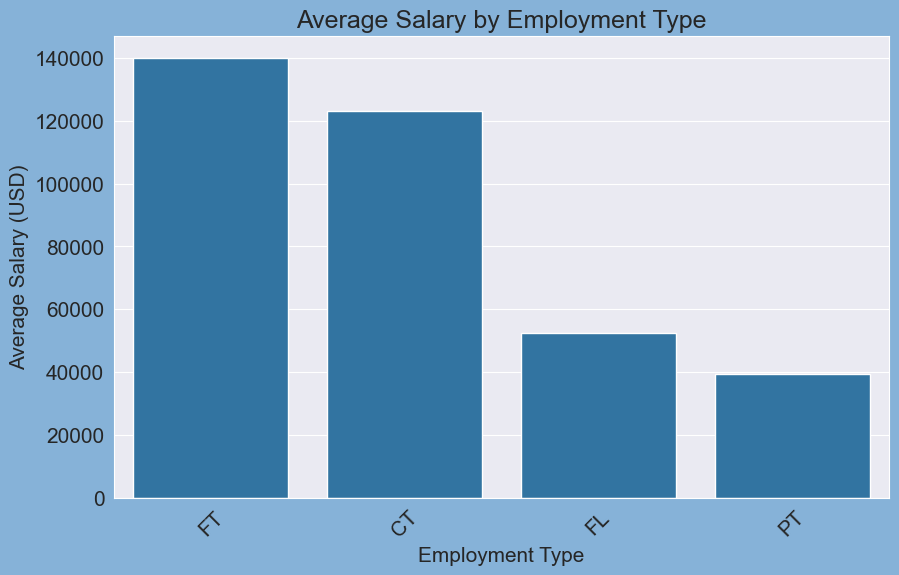

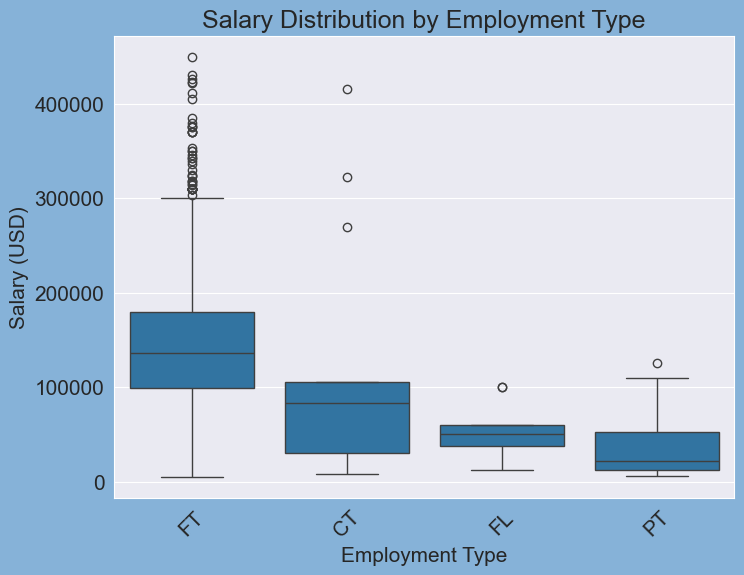

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data (assuming you've already loaded it)
# data = pd.read_csv("salaries.csv")

# Group the data by employment type and calculate summary statistics
employment_type_stats = data.groupby('employment_type')['salary_in_usd'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Display the summary statistics
print(employment_type_stats)
# Create a bar plot to compare employment types and their average salary
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=data, ci=None)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

# Create a boxplot to visualize the distribution of salaries for each employment type
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()



### 7.Are certain job titles more likely to be part-time or contract roles?

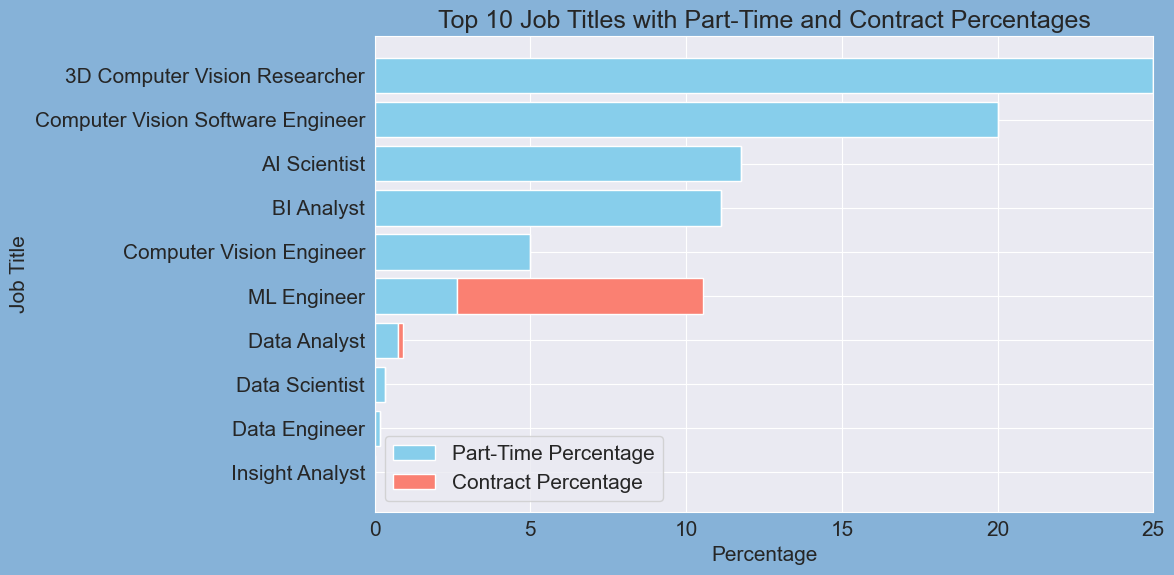

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a DataFrame called 'data'

# Create a pivot table to calculate the percentage of each employment type within each job title
pivot_table = pd.pivot_table(data, index='job_title', columns='employment_type', values='salary', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['PT_percentage'] = (pivot_table['PT'] / pivot_table['Total']) * 100
pivot_table['CT_percentage'] = (pivot_table['CT'] / pivot_table['Total']) * 100

# Sort the job titles by PT percentage in descending order
pivot_table_sorted = pivot_table.sort_values(by='PT_percentage', ascending=False)

# Select the top N job titles for visualization (you can adjust N as needed)
top_N = 10
top_job_titles = pivot_table_sorted.head(top_N)

# Create a bar chart to visualize the percentage of PT and CT roles for the top job titles
plt.figure(figsize=(12, 6))
plt.barh(top_job_titles.index, top_job_titles['PT_percentage'], label='Part-Time Percentage', color='skyblue')
plt.barh(top_job_titles.index, top_job_titles['CT_percentage'], left=top_job_titles['PT_percentage'], label='Contract Percentage', color='salmon')
plt.xlabel('Percentage')
plt.ylabel('Job Title')
plt.title(f'Top {top_N} Job Titles with Part-Time and Contract Percentages')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to display the top titles at the top
plt.tight_layout()

# Show the plot
plt.show()



### 8.What is the average remote_ratio for different job titles?

                      job_title  remote_ratio
98         Staff Data Scientist         100.0
88      Principal Data Engineer         100.0
60                 ETL Engineer         100.0
72               MLOps Engineer         100.0
37  Data Integration Specialist         100.0
..                          ...           ...
32    Data Analytics Specialist           0.0
38                    Data Lead           0.0
57     Deep Learning Researcher           0.0
41                 Data Modeler           0.0
39   Data Management Specialist           0.0

[99 rows x 2 columns]


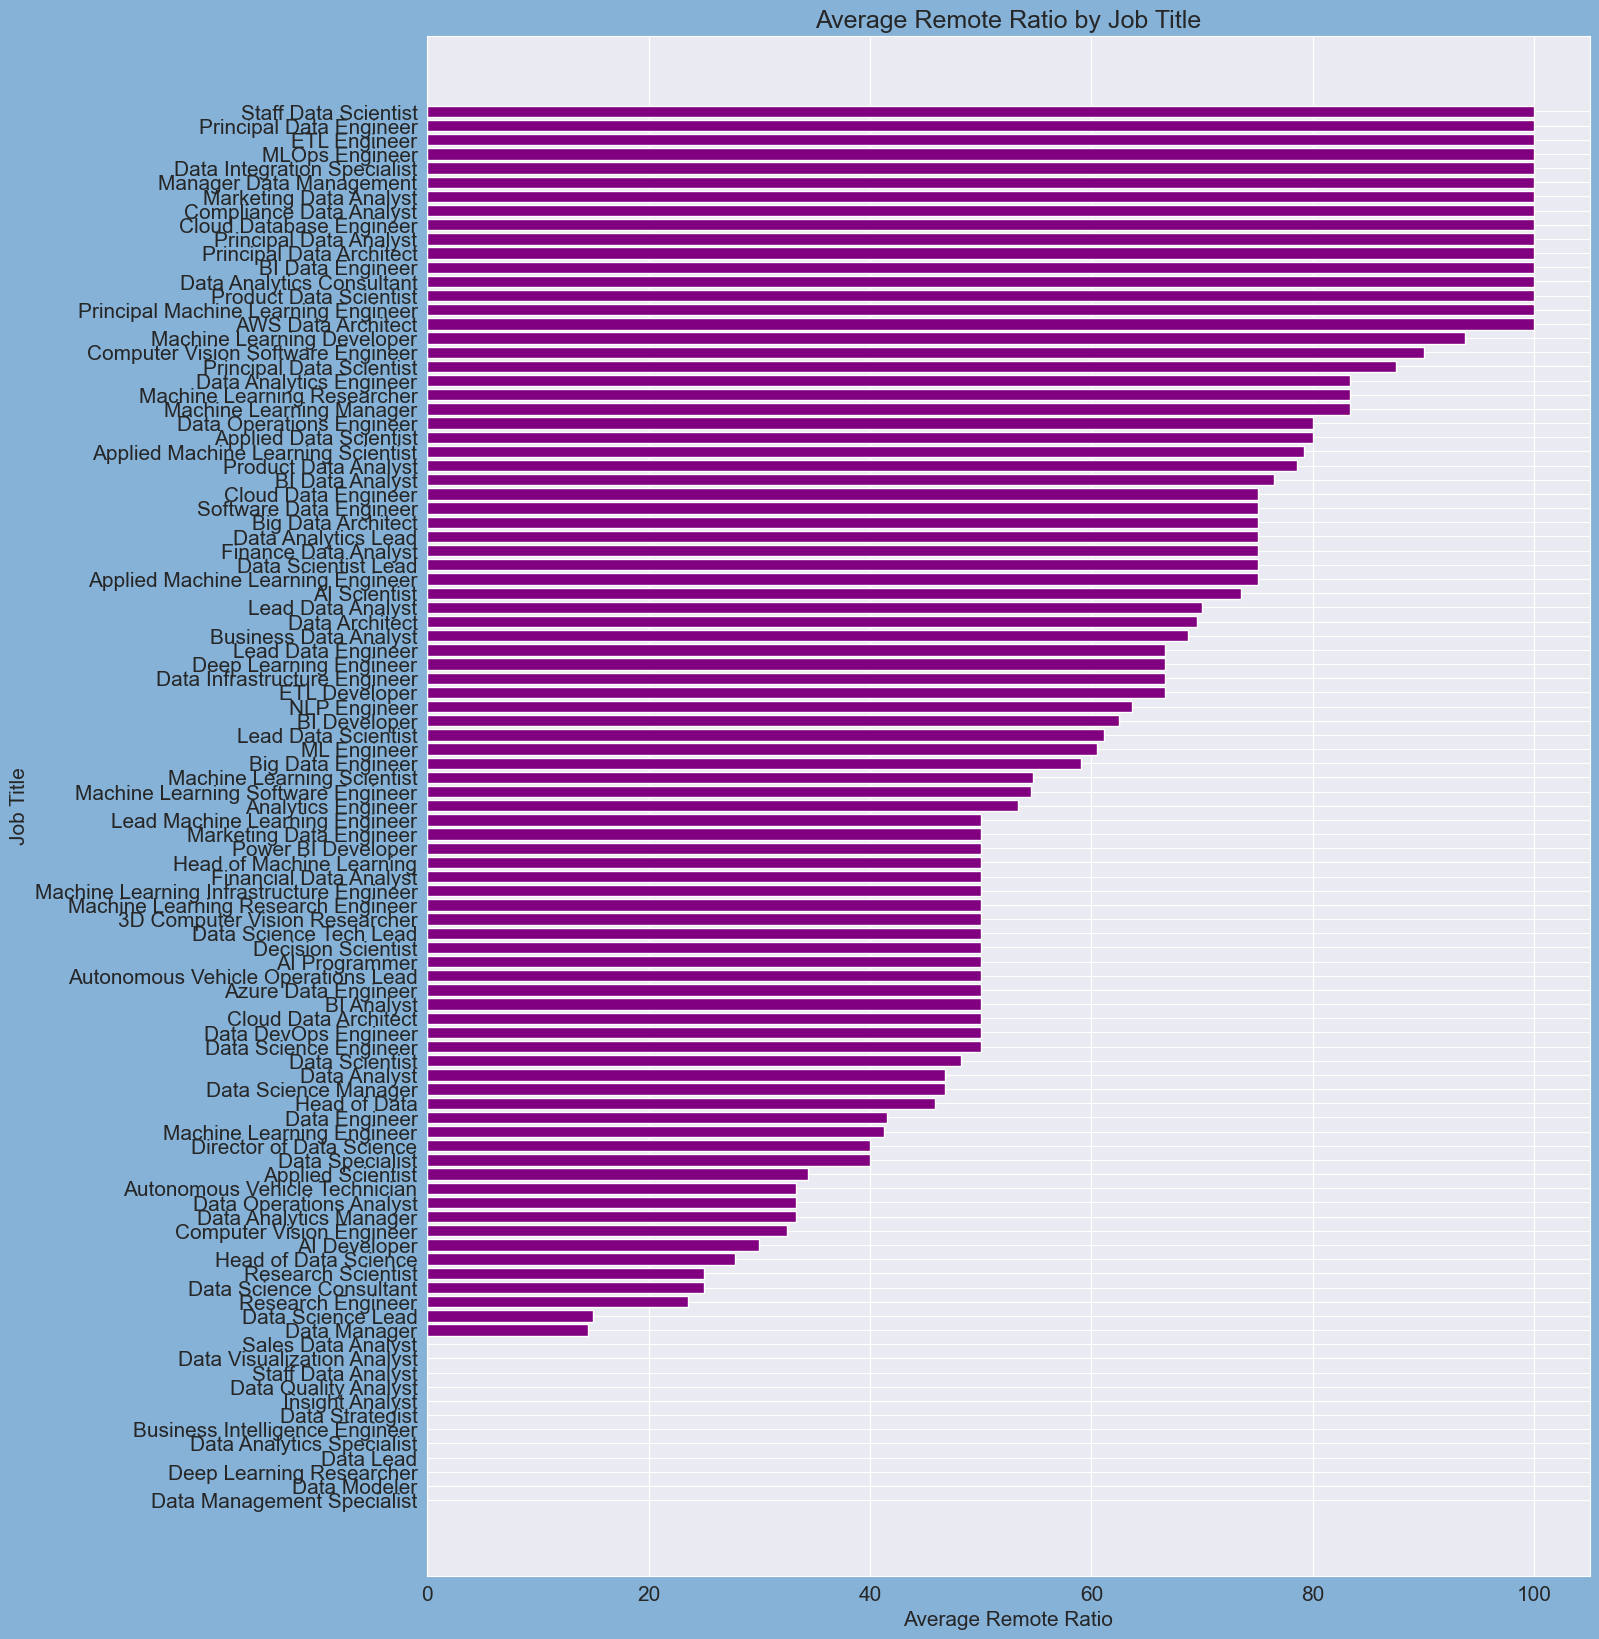

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average remote_ratio for each job title
average_remote_ratio_by_job = data.groupby('job_title')['remote_ratio'].mean().reset_index()

# Sort the data by average remote_ratio in descending order
average_remote_ratio_by_job = average_remote_ratio_by_job.sort_values(by='remote_ratio', ascending=False)
print(average_remote_ratio_by_job)
# Create a bar plot to visualize the average remote_ratio for different job titles
plt.figure(figsize=(15, 20))
plt.barh(average_remote_ratio_by_job['job_title'], average_remote_ratio_by_job['remote_ratio'], color='purple')
plt.xlabel('Average Remote Ratio')
plt.ylabel('Job Title')
plt.title('Average Remote Ratio by Job Title')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest remote ratio at the top
plt.show()


### 9.Does a higher remote_ratio correlate with higher or lower salaries?

Correlation coefficient between remote_ratio and salary_in_usd: -0.07


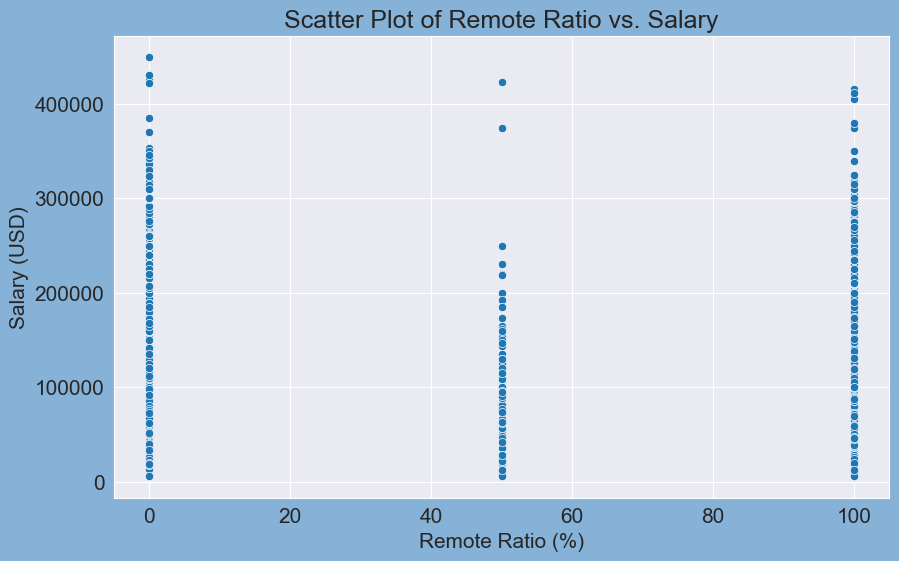

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data loaded in a DataFrame called 'data'

# Calculate the correlation coefficient between remote_ratio and salary_in_usd
correlation = data['remote_ratio'].corr(data['salary_in_usd'])

# Print the correlation coefficient
print(f"Correlation coefficient between remote_ratio and salary_in_usd: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Scatter Plot of Remote Ratio vs. Salary')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (USD)')
plt.show()


### 10.Are companies of certain sizes more likely to offer remote work?

company_size
S    72.039474
L    58.212058
M    43.116252
Name: remote_ratio, dtype: float64


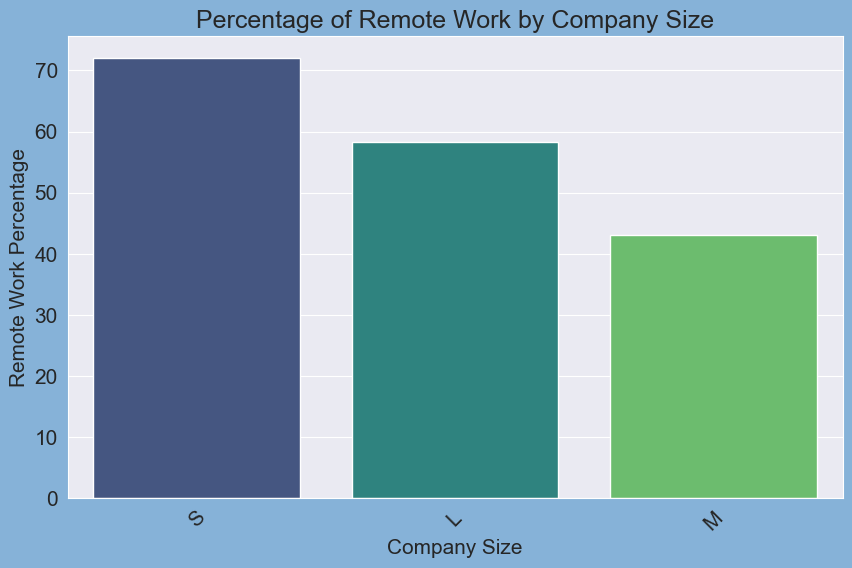

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data loaded in a DataFrame called 'data'

# Group the data by company size and calculate the percentage of remote work
company_size_remote = data.groupby('company_size')['remote_ratio'].mean()

# Sort the data by remote work percentage in descending order
company_size_remote = company_size_remote.sort_values(ascending=False)

# Print the remote work percentages
print(company_size_remote)

# Create a bar plot to visualize the relationship between company size and remote work
plt.figure(figsize=(10, 6))
sns.barplot(x=company_size_remote.index, y=company_size_remote.values, palette='viridis')
plt.title('Percentage of Remote Work by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Remote Work Percentage')
plt.xticks(rotation=45)
plt.show()


# Geographic Factors
### 11.Is there a salary disparity between different employee residences?

   employee_residence  salary_in_usd
39                 IL       422548.0
56                 MY       200000.0
63                 PR       160000.0
76                 US       146650.0
11                 CA       126598.5
..                ...            ...
52                 MD        18000.0
37                 ID        15000.0
71                 SK        12608.0
51                 MA        10000.0
53                 MK         6304.0

[80 rows x 2 columns]


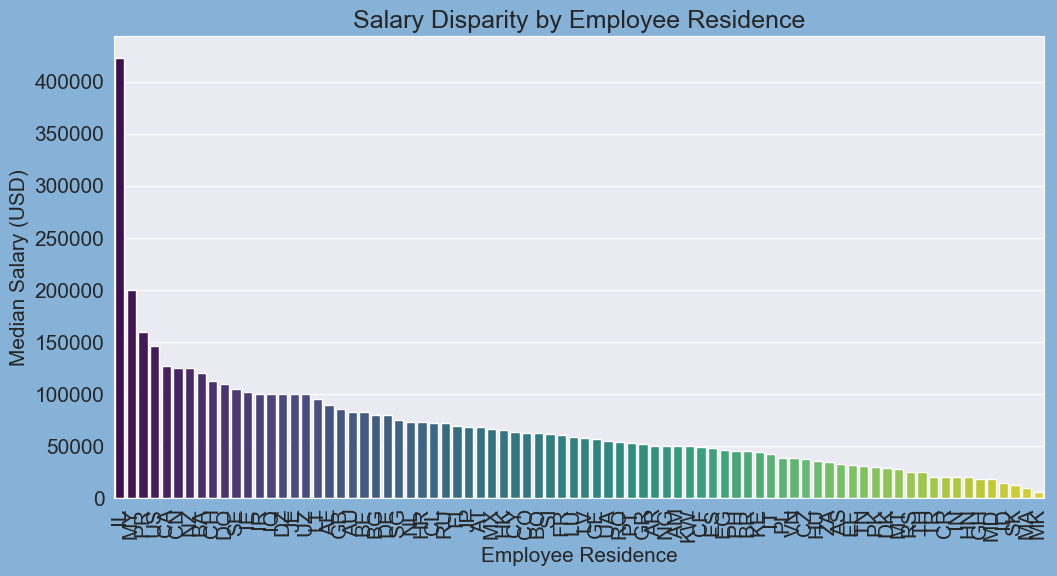

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called 'data'

# Group the data by 'employee_residence' and calculate the median salary for each group
residence_salary = data.groupby('employee_residence')['salary_in_usd'].median().reset_index()

# Sort the data by median salary in descending order
residence_salary = residence_salary.sort_values(by='salary_in_usd', ascending=False)
# Print the summary statistics
print(residence_salary)

# Create a bar plot to visualize salary disparities
plt.figure(figsize=(12, 6))
sns.barplot(data=residence_salary, x='employee_residence', y='salary_in_usd', palette='viridis')
plt.title('Salary Disparity by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Median Salary (USD)')
plt.xticks(rotation=90)
plt.show()


### 12.Are certain job titles more prevalent in specific locations?

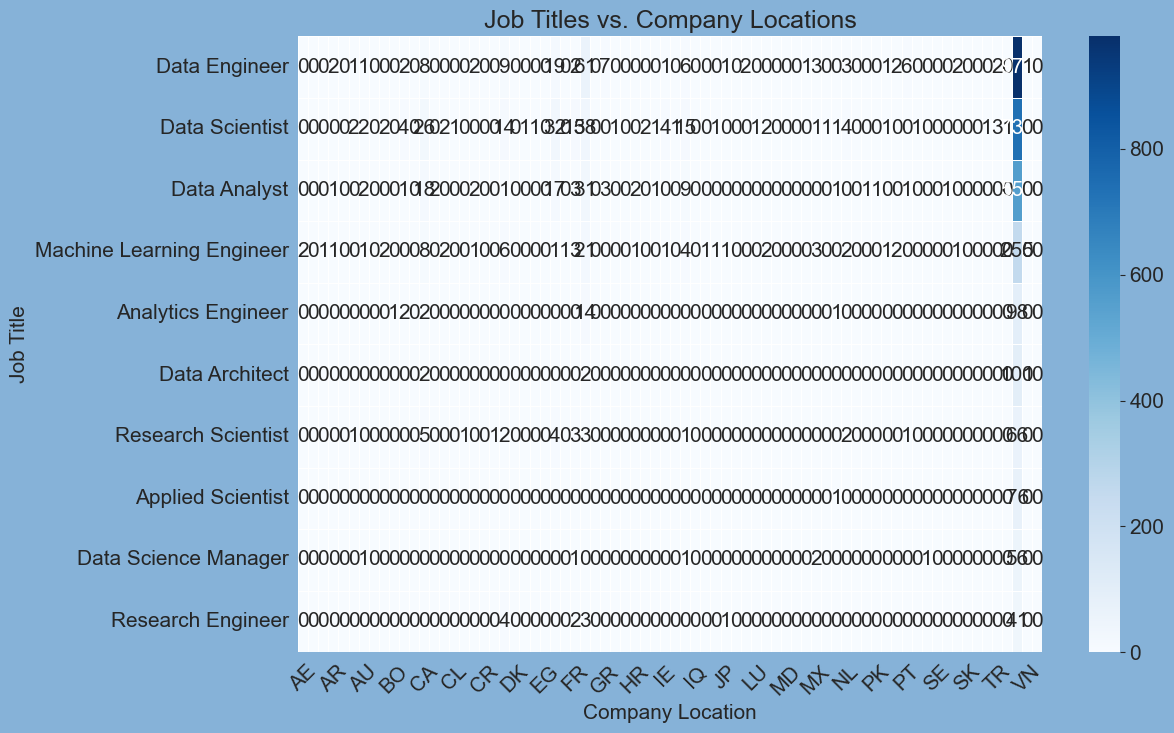

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataset into a DataFrame called 'data'

# Create a cross-tabulation (crosstab) between 'job_title' and 'company_location'
job_title_location_cross = pd.crosstab(data['job_title'], data['company_location'])

# Sort the job titles by their frequency in descending order
sorted_job_titles = job_title_location_cross.sum(axis=1).sort_values(ascending=False).index

# Select the top N job titles to analyze (you can adjust N as needed)
top_n_job_titles = sorted_job_titles[:10]

# Filter the crosstab to only include the top N job titles
filtered_job_title_location_cross = job_title_location_cross.loc[top_n_job_titles]

# Create a heatmap to visualize the prevalence of job titles in specific locations
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_job_title_location_cross, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Job Titles vs. Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()


# Company Characteristics
### 13.What is the average salary offered by small, medium, and large companies?


In [67]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame called 'data'

# Group the data by 'company_size' and calculate the mean salary for each group
average_salary_by_company_size = data.groupby('company_size')['salary_in_usd'].mean()

# Print the result
print(average_salary_by_company_size)


company_size
L    120131.035343
M    144739.274779
S     77839.526316
Name: salary_in_usd, dtype: float64


### 14.Do certain company sizes prefer specific experience levels?

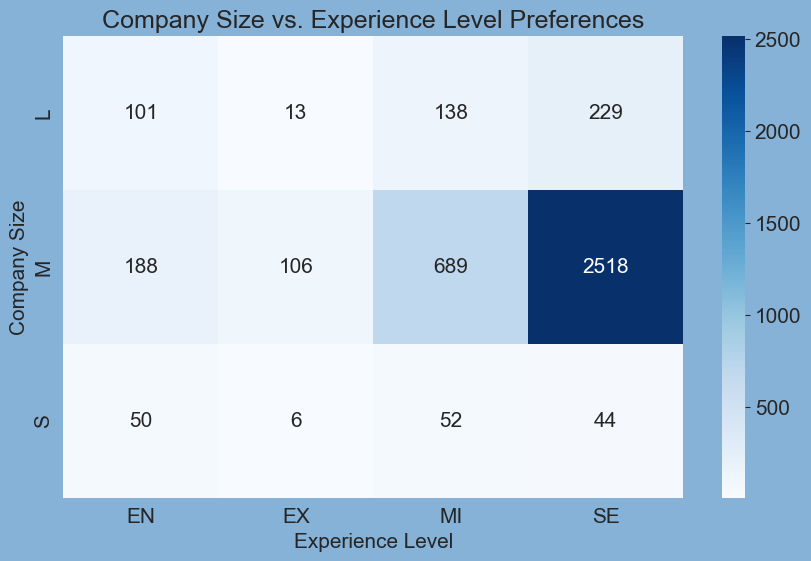

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame called 'data'

# Group the data by 'company_size' and 'experience_level' and count the occurrences
company_experience_counts = data.groupby(['company_size', 'experience_level']).size().unstack(fill_value=0)

# Create a heatmap to visualize the preferences
plt.figure(figsize=(10, 6))
sns.heatmap(company_experience_counts, annot=True, cmap='Blues', fmt='d')
plt.title('Company Size vs. Experience Level Preferences')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.show()


# Time Trends
### 15.Has the average salary increased from 2020 to 2023?


In [69]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame called 'data'

# Filter the dataset for the years 2020 and 2023
filtered_data = data[data['work_year'].isin([2020, 2021, 2022, 2023])]

# Calculate the average salary for each year
average_salary_by_year = filtered_data.groupby('work_year')['salary_in_usd'].mean()

# Display the average salaries for 2020 and 2023
average_salary_2020 = average_salary_by_year.loc[2020]
average_salary_2021 = average_salary_by_year.loc[2021]
average_salary_2022 = average_salary_by_year.loc[2022]
average_salary_2023 = average_salary_by_year.loc[2023]

print(f"Average Salary in 2020: ${average_salary_2020:.2f}")
print(f"Average Salary in 2021: ${average_salary_2021:.2f}")
print(f"Average Salary in 2022: ${average_salary_2022:.2f}")
print(f"Average Salary in 2023: ${average_salary_2023:.2f}")

# Check if the average salary has increased
if average_salary_2023 > average_salary_2020:
    print("The average salary has increased from 2020 to 2023.")
elif average_salary_2023 < average_salary_2020:
    print("The average salary has decreased from 2020 to 2023.")
else:
    print("The average salary has remained the same from 2020 to 2023.")


Average Salary in 2020: $91883.12
Average Salary in 2021: $93939.65
Average Salary in 2022: $132999.25
Average Salary in 2023: $150940.24
The average salary has increased from 2020 to 2023.


### 16.Are remote roles becoming more common over the years covered in the dataset?

work_year
2020    64.285714
2021    68.831169
2022    55.455635
2023    35.472660
Name: remote_ratio, dtype: float64
Remote roles are not becoming more common over the years.


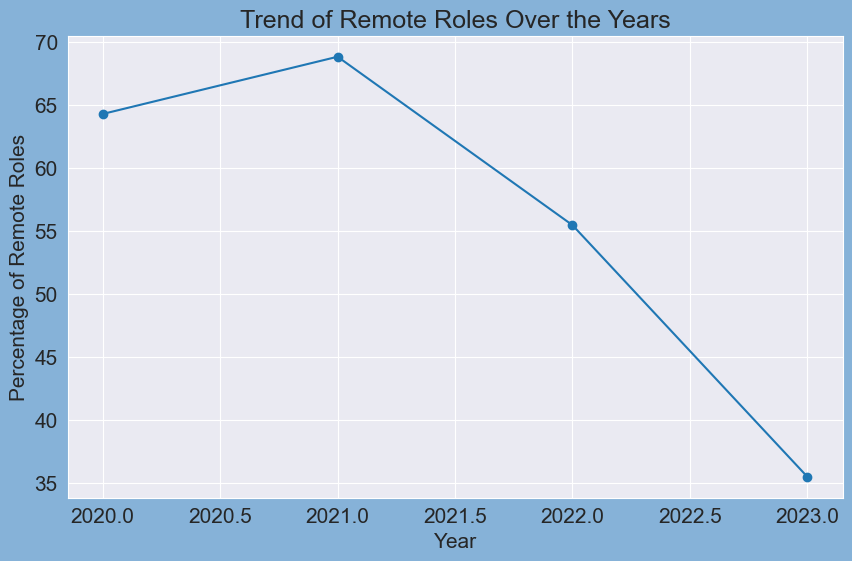

In [70]:
import matplotlib.pyplot as plt

# Group the data by 'work_year' and calculate the percentage of remote roles for each year
remote_ratio_by_year = data.groupby('work_year')['remote_ratio'].mean()
# Print the percentage of remote roles for each year
print(remote_ratio_by_year)

# Check if remote roles are becoming more common over the years
if remote_ratio_by_year[2023] > remote_ratio_by_year[2020]:
    print("Remote roles are becoming more common over the years.")
else:
    print("Remote roles are not becoming more common over the years.")

# Plot the trend of remote roles over the years
plt.figure(figsize=(10, 6))
plt.plot(remote_ratio_by_year.index, remote_ratio_by_year.values, marker='o', linestyle='-')
plt.title('Trend of Remote Roles Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Remote Roles')
plt.grid(True)

# Show the plot
plt.show()


# Categorical Relationships
### 17.Is there a relationship between company size and employment type (e.g., do larger companies offer more full-time roles)?


In [71]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is already loaded as 'data'

# Create a cross-tabulation of company_size and employment_type
cross_tab = pd.crosstab(data['company_size'], data['employment_type'])

# Display the cross-tabulation
print(cross_tab)

# Perform the chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Display the chi-squared test results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)
# Determine if there is a significant relationship
alpha = 0.05  # Significance level
if p < alpha:
    print("\nThere is a significant relationship between company size and employment type.")
else:
    print("\nThere is no significant relationship between company size and employment type.")



employment_type  CT  FL    FT  PT
company_size                     
L                 2   1   472   6
M                 6   6  3484   5
S                 5   4   137   6
Chi-squared statistic: 140.29170935299695
P-value: 8.697558988435168e-28
Degrees of freedom: 6
Expected frequencies table:
[[1.51257862e+00 1.27987421e+00 4.76229560e+02 1.97798742e+00]
 [1.10094340e+01 9.31567489e+00 3.46627794e+03 1.43969521e+01]
 [4.77987421e-01 4.04450895e-01 1.50492501e+02 6.25060474e-01]]

There is a significant relationship between company size and employment type.


### 18.Are certain combinations of job title and experience level particularly high-paying?

Top 10 Combinations of Job Title and Experience Level with Highest Average Salaries:
                          job_title experience_level        salary
141        Head of Machine Learning               EX  6.000000e+06
183        Principal Data Architect               SE  3.000000e+06
140            Head of Data Science               MI  2.555000e+06
150  Lead Machine Learning Engineer               SE  2.548667e+06
37                  BI Data Analyst               MI  1.444750e+06
72              Data Analytics Lead               MI  1.440000e+06
152                     ML Engineer               MI  1.324554e+06
149             Lead Data Scientist               SE  1.170195e+06
143               Lead Data Analyst               MI  7.762500e+05
58         Computer Vision Engineer               MI  6.530000e+05


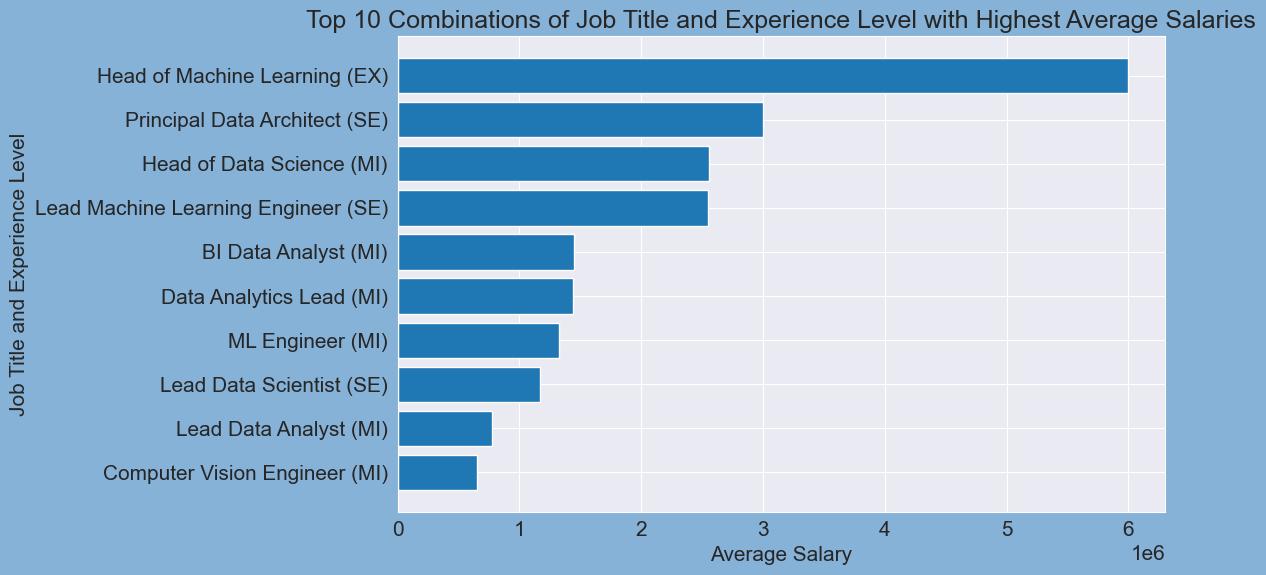

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
# Group the data by job title and experience level and calculate the average salary
average_salary_by_combination = data.groupby(['job_title', 'experience_level'])['salary'].mean().reset_index()

# Sort the combinations by average salary in descending order
sorted_combinations = average_salary_by_combination.sort_values(by='salary', ascending=False)

# Print the top N combinations with the highest average salaries
N = 10  # You can change N to the desired number of top combinations
top_combinations = sorted_combinations.head(N)

# Display the top combinations
print("Top", N, "Combinations of Job Title and Experience Level with Highest Average Salaries:")
print(top_combinations)
# Create a bar plot to visualize the top combinations
plt.figure(figsize=(12, 6))
plt.barh(top_combinations['job_title'] + ' (' + top_combinations['experience_level'] + ')', top_combinations['salary'])
plt.xlabel('Average Salary')
plt.ylabel('Job Title and Experience Level')
plt.title('Top {} Combinations of Job Title and Experience Level with Highest Average Salaries'.format(N))
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest salary at the top
plt.tight_layout()

# Show the plot
plt.show()

# Advanced Analysis
### 19.Can you predict an individual's salary based on factors like experience level, job title, and company size?


Mean Absolute Error: 42592.654231692206
Mean Squared Error: 2919479625.120789
Root Mean Squared Error: 54032.209145293964
R-squared: 0.20915908944214823


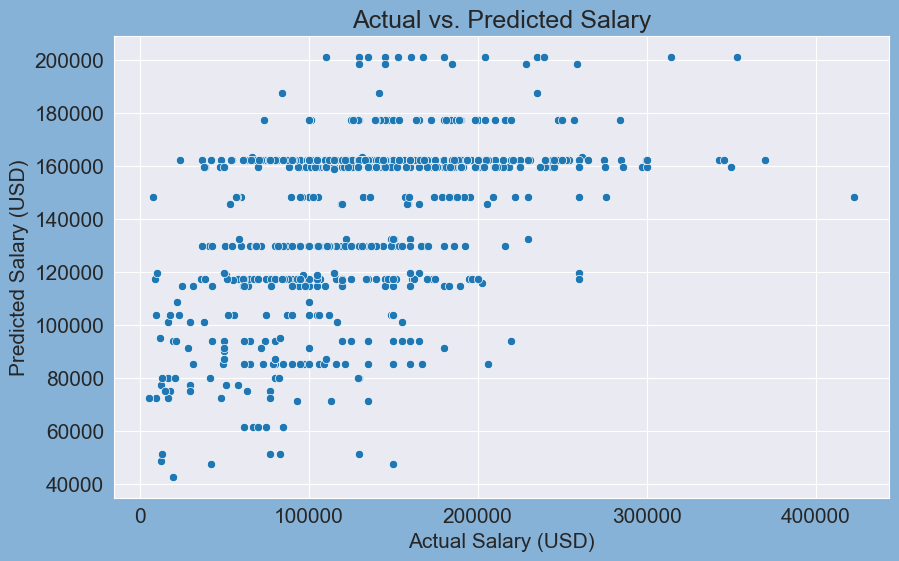

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("salaries.csv")

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=["experience_level", "job_title", "company_size"], drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded[["experience_level_MI", "experience_level_SE", "experience_level_EX",
                  "job_title_Data Scientist", "job_title_Machine Learning Engineer", "job_title_Data Analyst",
                  "company_size_M", "company_size_S"]]
y = data_encoded["salary_in_usd"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Visualize the model's predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs. Predicted Salary")
plt.show()


### 20.What are the most important features in determining one's salary in this dataset?


salary_in_usd                          1.000000
experience_level_SE                    0.343596
work_year                              0.237258
company_size_M                         0.196838
experience_level_EX                    0.156024
job_title_Data Science Manager         0.105146
job_title_Applied Scientist            0.104346
job_title_Machine Learning Engineer    0.088085
job_title_Director of Data Science     0.062861
job_title_Data Architect               0.061510
Name: salary_in_usd, dtype: float64


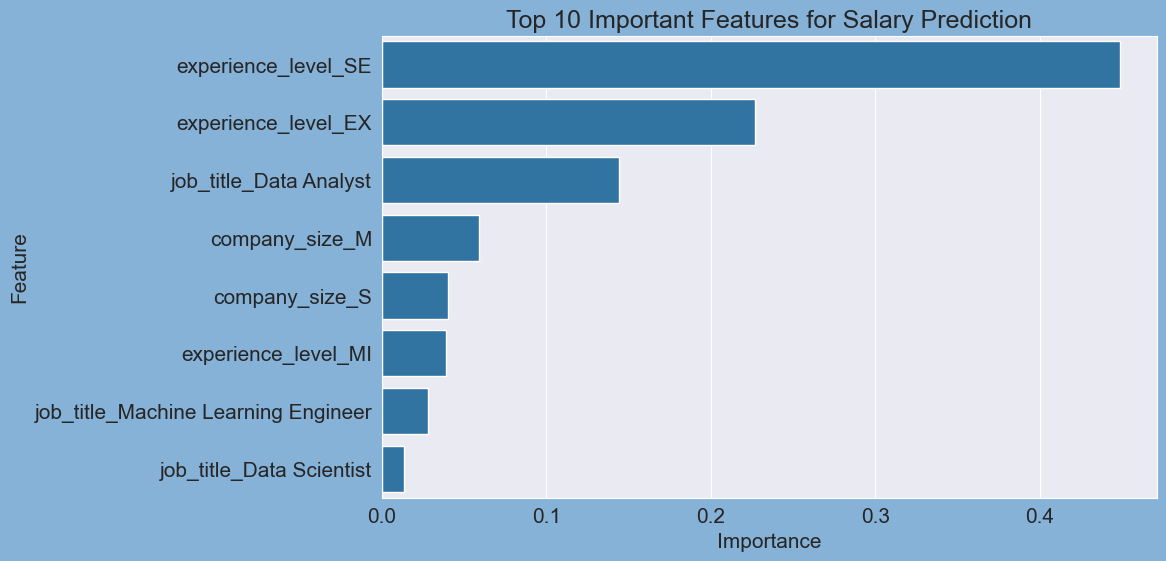

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Calculate feature correlations with the target variable
correlations = data_encoded.corr()['salary_in_usd'].sort_values(ascending=False)

# Display the top correlated features
top_n = 10
print(correlations.head(top_n))

# Plot the top N important features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Important Features for Salary Prediction')
plt.show()
